In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import re
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# **Dataset Preprocessing**

**Most of the code in this part is  from the first three experiments in the AI lab. 😊**

Load a CSV file named cars.csv into a DataFrame

In [6]:
cars_Data = pd.read_csv('cars.csv')
df = pd.DataFrame(cars_Data)
df.head()

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
0,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,ksa
1,Peugeot Traveller 2021 L3 VIP,"SAR 140,575",2.0,4,180,8 Seater,8.8,peugeot,ksa
2,Suzuki Jimny 2021 1.5L Automatic,"SAR 98,785",1.5,4,102,145,4 Seater,suzuki,ksa
3,Ford Bronco 2021 2.3T Big Bend,"SAR 198,000",2.3,4,420,4 Seater,7.5,ford,ksa
4,Honda HR-V 2021 1.8 i-VTEC LX,Orangeburst Metallic,1.8,4,140,190,5 Seater,honda,ksa


In [7]:
# print the shape of the DataFrame
print(f"Data Set shape = {df.shape}")

Data Set shape = (6308, 9)


In [8]:
# Show the dataFrame info, type of features
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car name         6308 non-null   object
 1   price            6308 non-null   object
 2   engine_capacity  6308 non-null   object
 3   cylinder         5684 non-null   object
 4   horse_power      6308 non-null   object
 5   top_speed        6308 non-null   object
 6   seats            6308 non-null   object
 7   brand            6308 non-null   object
 8   country          6308 non-null   object
dtypes: object(9)
memory usage: 443.7+ KB
None


##**Document Missing Values**

In [9]:
#Here are the records with missing values
df[df.isnull().any(axis=1)]

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
51,Ford Figo Sedan 2021 1.5L Ambient,"SAR 48,549",1.5,NaN,112,172,5 Seater,ford,ksa
61,Volvo S90 2021 T6 AWD Inscription,Birch Light Metallic,2.0,NaN,320,250,5 Seater,volvo,ksa
63,Volvo S90 2021 T6 AWD R Design,TBD,2.0,NaN,320,250,5 Seater,volvo,ksa
82,Great Wall Wingle 5 2021 2.2L Single Cabin Sta...,"SAR 49,419",2.2,NaN,105,140,2 Seater,great-wall,ksa
120,Ford F-150 2021 3.5L EcoBoost Crew Cab Lariat ...,"Guard, Stone Gray",3.5,NaN,365,160,5 Seater,ford,ksa
...,...,...,...,...,...,...,...,...,...
6230,Mercedes-Benz AMG GT 2021 4.0L C,"AED 680,000",4.0,NaN,550,317,2 Seater,mercedes-benz,uae
6246,Mercedes-Benz AMG GT 2021 4.0L R,"AED 730,000",4.0,NaN,576,318,2 Seater,mercedes-benz,uae
6272,Mercedes-Benz S 63 AMG Coupe 2021 4.0L 4MATIC+,"AED 945,000",4.0,NaN,601,250,4 Seater,mercedes-benz,uae
6285,Mercedes-Benz S 65 AMG Coupe 2021 6.0L,"AED 1,100,000",6.0,NaN,630,250,4 Seater,mercedes-benz,uae


there is 624 records with missing values

In [10]:
#check if there is any empty record
print(f"Number of empty records = {df.isnull().all(axis=1).sum()}")

Number of empty records = 0


In [11]:
# Show the Missing Values
print("Missing Values for each featuer: ")
df.isnull().sum()

Missing Values for each featuer: 


,0
car name,0
price,0
engine_capacity,0
cylinder,624
horse_power,0
top_speed,0
seats,0
brand,0
country,0


In [12]:
car_name_counts = df['car name'].value_counts()
car_name_counts

,count
car name,
Mercedes-Benz C-Class 2022 C 300,10
Fiat 500e 2021 La Prima,7
Porsche 911 2021 Carrera S Cabriolet,7
Porsche 911 2021 Carrera 4S,7
Kia Rio Sedan 2021 1.6L MPI,7
...,...
Jaguar F-Type Convertible 2021 2.0T R-Dynamic (300 PS),1
Hyundai Kona 2021 1.6L T-GDI GLS Premium (AWD),1
Chevrolet Trax 2021 1.8L Premier AWD,1


In [13]:
car_records = df[df['car name'] == 'Porsche 911 2021 Carrera S Cabriolet']
car_records

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
929,Porsche 911 2021 Carrera S Cabriolet,Guards Red,3.0,6,450,306,2 Seater,porsche,ksa
1382,Porsche 911 2021 Carrera S Cabriolet,Guards Red,3000,6,450,306,2 Seater,porsche,egypt
2172,Porsche 911 2021 Carrera S Cabriolet,Guards Red,3.0,6,450,306,2 Seater,porsche,bahrain
3125,Porsche 911 2021 Carrera S Cabriolet,Guards Red,3.0,6,450,306,2 Seater,porsche,qatar
4017,Porsche 911 2021 Carrera S Cabriolet,Guards Red,3.0,6,450,306,2 Seater,porsche,oman
4967,Porsche 911 2021 Carrera S Cabriolet,Guards Red,3.0,6,450,306,2 Seater,porsche,kuwait
6179,Porsche 911 2021 Carrera S Cabriolet,Guards Red,3.0,6,450,306,2 Seater,porsche,uae


In [14]:
car_records = df[df['car name'] == 'Porsche 911 2021 Carrera 4S']
car_records

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
913,Porsche 911 2021 Carrera 4S,Carmine Red,3.0,6,450,306,4 Seater,porsche,ksa
1379,Porsche 911 2021 Carrera 4S,Carmine Red,3000,6,450,306,4 Seater,porsche,egypt
2169,Porsche 911 2021 Carrera 4S,Carmine Red,3.0,6,450,306,4 Seater,porsche,bahrain
3116,Porsche 911 2021 Carrera 4S,Carmine Red,3.0,6,450,306,4 Seater,porsche,qatar
4016,Porsche 911 2021 Carrera 4S,Carmine Red,3.0,6,450,306,4 Seater,porsche,oman
4944,Porsche 911 2021 Carrera 4S,Carmine Red,3.0,6,450,306,4 Seater,porsche,kuwait
6169,Porsche 911 2021 Carrera 4S,Carmine Red,3.0,6,450,306,4 Seater,porsche,uae


In [15]:
car_records = df[df['car name'] == 'Fiat 500e 2021 La Prima']
car_records

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
0,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,ksa
1008,Fiat 500e 2021 La Prima,TBD,Cylinders,Drive Type,Horsepower (bhp),Top Speed (Km/h),Seating Capacity,fiat,egypt
1394,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,bahrain
2302,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,qatar
3219,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,oman
4132,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,kuwait
5070,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,uae


### **Replace inavalid entries on the feature:**

#### **for Price column:**

In [16]:

# function to clean the price column
def clean_price(price):
    # Check the string have a currency type followed by number
    if isinstance(price, str) and re.match(r'^[A-Z]{3}\s[\d,]+$', price.strip()):
        return price.strip()  # Keep valid price
    else:
        return None  # Replace invalid price with None

df['price'] = df['price'].apply(clean_price)

# Display the result
print(df[['price']].head(10))


         price
0         None
1  SAR 140,575
2   SAR 98,785
3  SAR 198,000
4         None
5   SAR 95,335
6   SAR 82,845
7   SAR 76,545
8  SAR 116,900
9  SAR 238,000


In [17]:
print(df['price'].isnull().sum(), "invalid entries replaced with None")
print(df['price'].notnull().sum(), "valid entries kept")

1329 invalid entries replaced with None
4979 valid entries kept


In [18]:
# Show the Missing Values
print("Missing Values for each featuer: ")
df.isnull().sum()

Missing Values for each featuer: 


,0
car name,0
price,1329
engine_capacity,0
cylinder,624
horse_power,0
top_speed,0
seats,0
brand,0
country,0


#### **for engine_capacity column:**

In [19]:
# function to clean the engine_capacity column
def clean_engine_capacity(capacity):
    if isinstance(capacity, str) and re.match(r'^\d+(\.\d+)?$', capacity.strip()):
        return float(capacity.strip())  # Convert valid numeric strings to float
    else:
        return None  # Replace invalid entries with None

df['engine_capacity'] = df['engine_capacity'].apply(clean_engine_capacity)
print(df['engine_capacity'].isnull().sum(), "invalid entries replaced with None")
print(df['engine_capacity'].notnull().sum(), "valid entries retained")

3 invalid entries replaced with None
6305 valid entries retained


#### **for cylinder column:**

In [20]:
# function to clean the `cylinder` column
def clean_cylinder(cylinder):
    if isinstance(cylinder, str) and cylinder.strip().isdigit():
        return int(cylinder.strip())  # Convert valid numeric strings to integer
    else:
        return None  # Replace invalid entries with None

df['cylinder'] = df['cylinder'].apply(clean_cylinder)

In [21]:
print(df['cylinder'].isnull().sum(), "invalid entries replaced with None")
print(df['cylinder'].notnull().sum(), "valid entries retained")

734 invalid entries replaced with None
5574 valid entries retained


#### **for horse_power column:**

In [22]:
# function to clean the horse_power column
def clean_horse_power(hp):
    if isinstance(hp, str) and hp.strip().isdigit():
        return int(hp.strip())  # Convert valid numeric strings to integer
    else:
        return None  # Replace invalid entries with None

df['horse_power'] = df['horse_power'].apply(clean_horse_power)

In [23]:
# Count valid and None values in the cleaned column
print(df['horse_power'].isnull().sum(), "invalid entries replaced with None")
print(df['horse_power'].notnull().sum(), "valid entries retained")

122 invalid entries replaced with None
6186 valid entries retained


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car name         6308 non-null   object 
 1   price            4979 non-null   object 
 2   engine_capacity  6305 non-null   float64
 3   cylinder         5574 non-null   float64
 4   horse_power      6186 non-null   float64
 5   top_speed        6308 non-null   object 
 6   seats            6308 non-null   object 
 7   brand            6308 non-null   object 
 8   country          6308 non-null   object 
dtypes: float64(3), object(6)
memory usage: 443.7+ KB
None


## **Handling Missing Value**

#### **i well start to handle the price column:**

In [25]:
# get currency from the price column
def extract_currency(price):
    if isinstance(price, str) and ' ' in price:
        return price.split(' ')[0]
    return None

#create a new `currency` column
df['currency'] = df['price'].apply(extract_currency)

In [26]:
# Count the frequency of each currency
currency_counts = df['currency'].value_counts()
print(currency_counts)

currency
AED    928
QAR    770
KWD    762
OMR    759
BHD    758
SAR    707
EGP    295
Name: count, dtype: int64


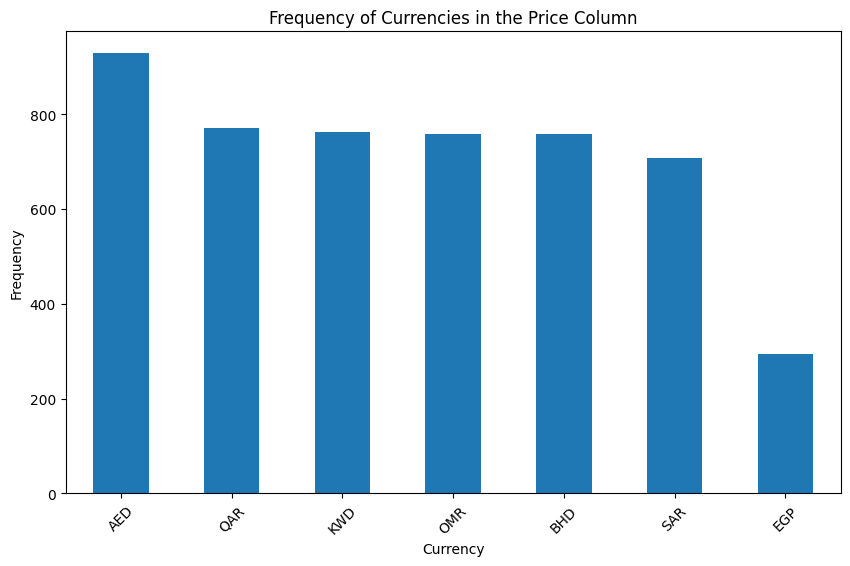

In [27]:
import matplotlib.pyplot as plt

# Plot the frequency of currencies
plt.figure(figsize=(10, 6))
currency_counts.plot(kind='bar')
plt.title('Frequency of Currencies in the Price Column')
plt.xlabel('Currency')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [28]:
df.drop(columns='currency', inplace=True)

 convert the listed currencies to USD

In [29]:
# currency conversion value to USD
conversion_rates = {
    'AED': 0.27,  # United Arab Emirates Dirham
    'QAR': 0.27,  # Qatari Riyal
    'KWD': 3.27,  # Kuwaiti Dinar
    'OMR': 2.60,  # Omani Rial
    'BHD': 2.65,  # Bahraini Dinar
    'SAR': 0.27,  # Saudi Riyal
    'EGP': 0.032  # Egyptian Pound
}

# Function to convert prices to USD
def convert_to_usd(price):
    if isinstance(price, str) and ' ' in price:

        parts = price.split(' ')  # Split currency and amount

        currency = parts[0]

        numeric_part = parts[1].replace(',', '')  # Remove commas

        if currency in conversion_rates:
            # Convert to USD
            return float(numeric_part) * conversion_rates[currency]

    return None  # Handle invalid or missing cases

df['price'] = df['price'].apply(convert_to_usd)

print(df[['brand', 'price']].head())


     brand     price
0     fiat       NaN
1  peugeot  37955.25
2   suzuki  26671.95
3     ford  53460.00
4    honda       NaN


In [30]:
df.rename(columns={'price': 'price_usd'}, inplace=True)

In [31]:
df[['brand', 'price_usd']].head()

,brand,price_usd
0,fiat,NaN
1,peugeot,37955.25
2,suzuki,26671.95
3,ford,53460.00
4,honda,NaN


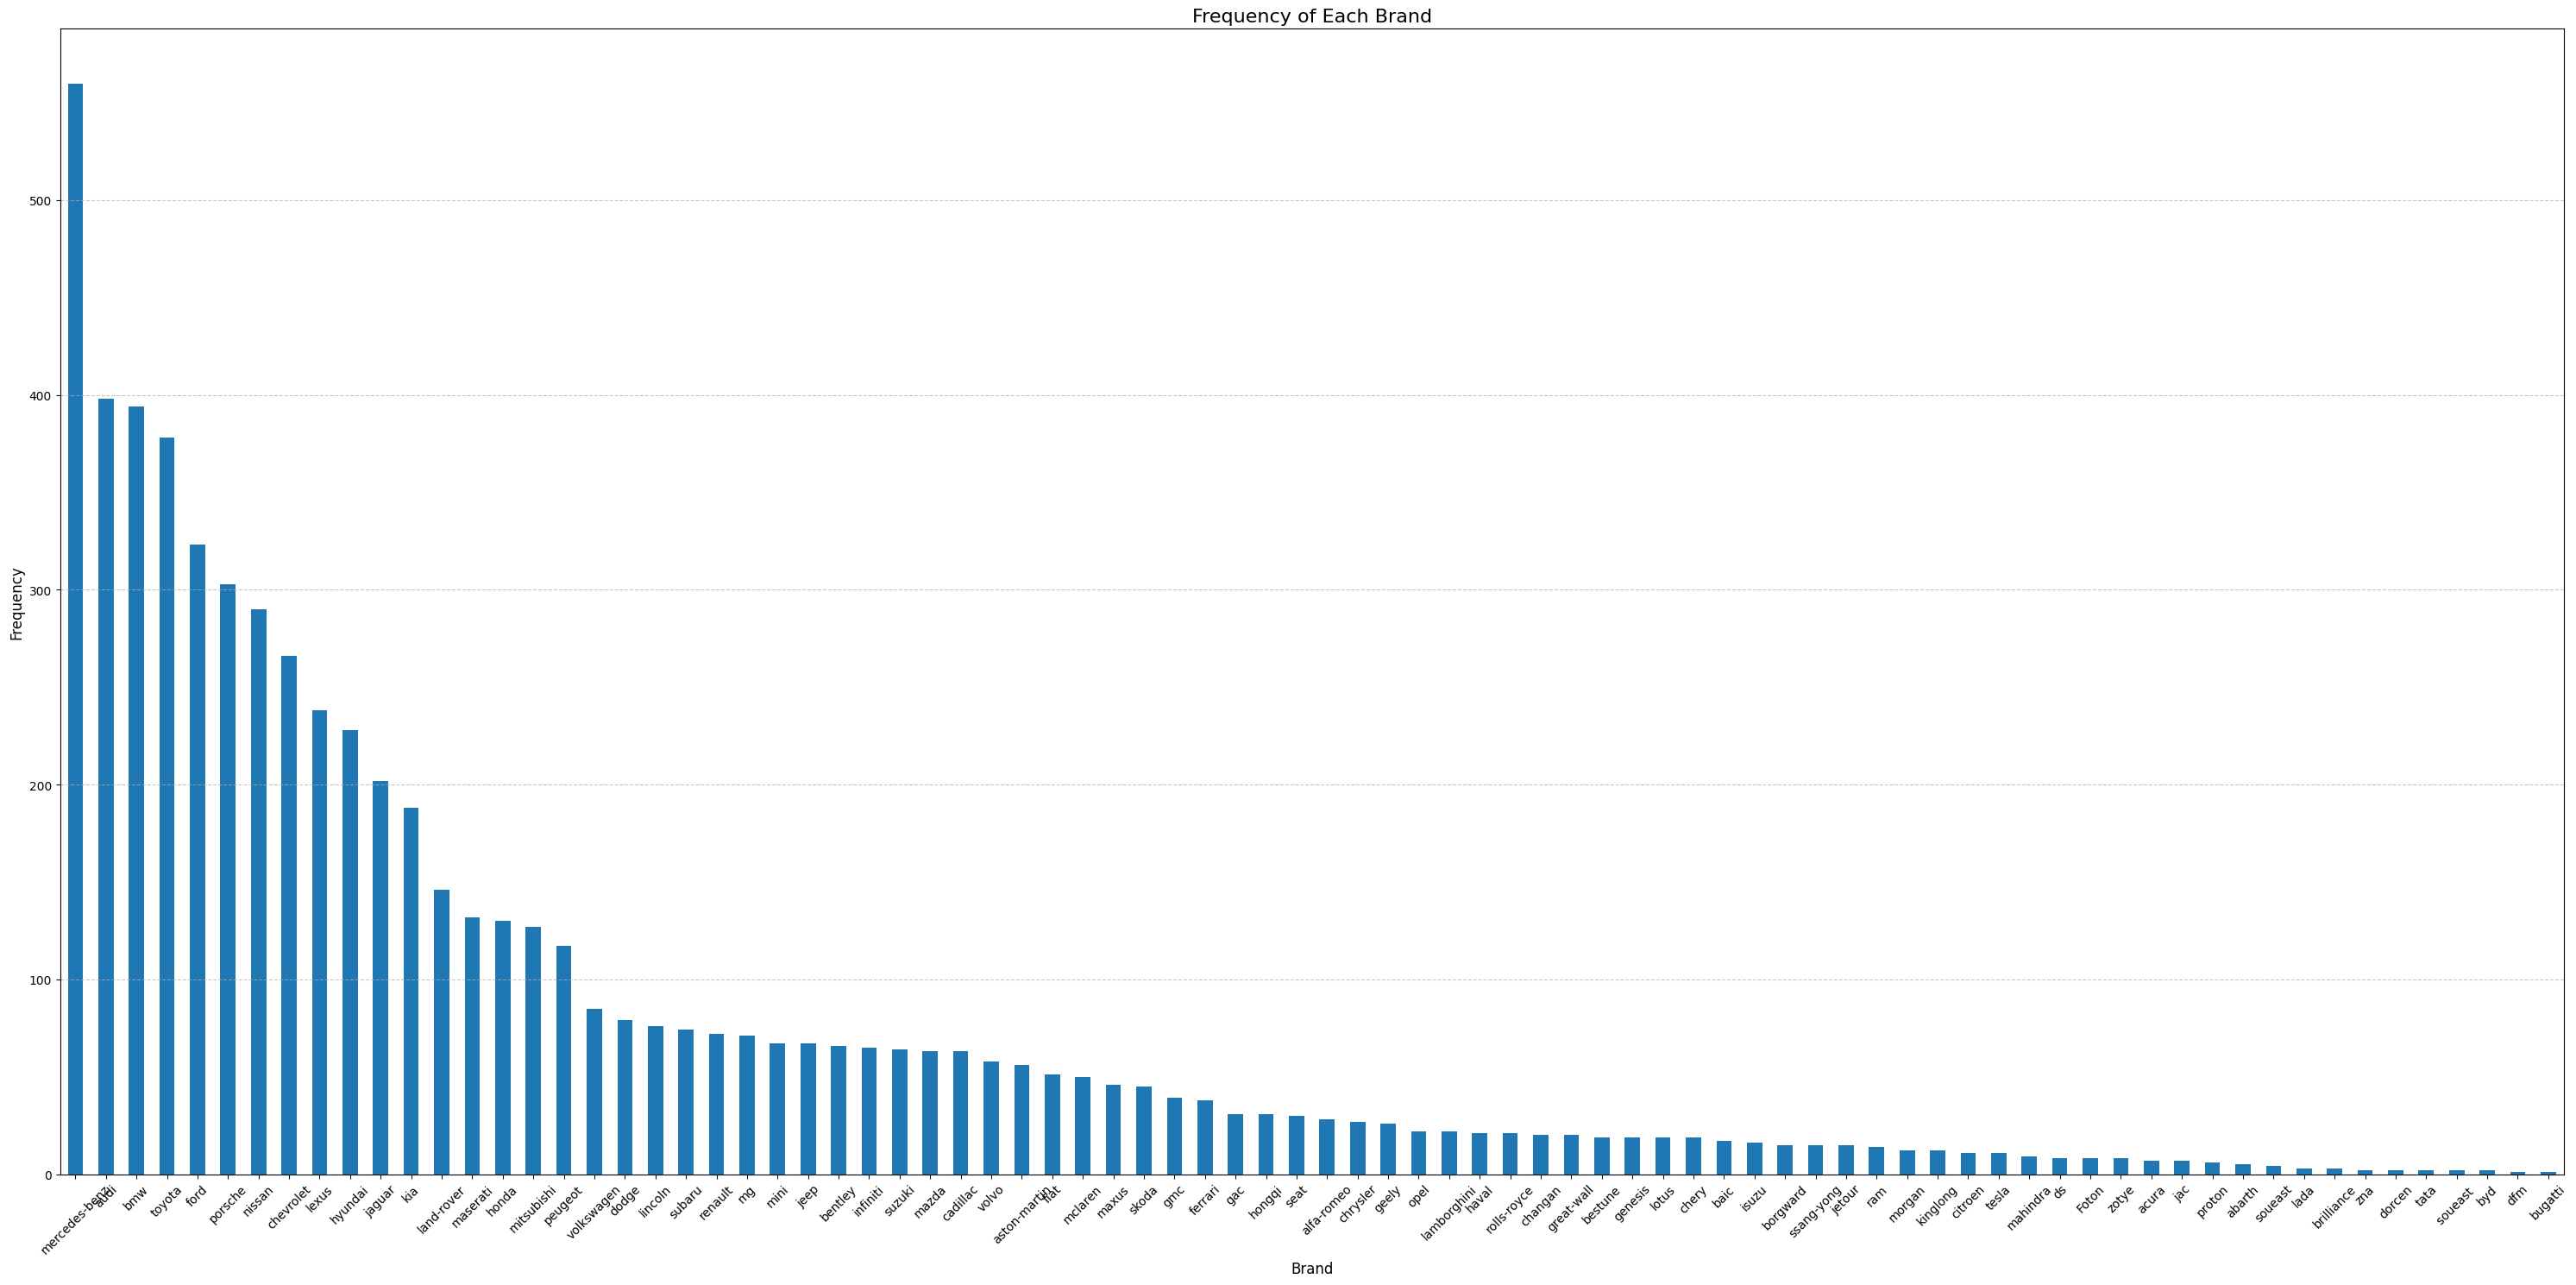

In [32]:
# Count the frequency of each brand
brand_counts = df['brand'].value_counts()

# Plot the frequency for each brand
plt.figure(figsize=(30, 15))
brand_counts.plot(kind='bar')
plt.title('Frequency of Each Brand', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
high_price_records = df[df['price_usd'] > 3000000]
print(high_price_records)

                                   car name  price_usd  engine_capacity  \
956  Bugatti Chiron 2021 8.0L W16 Pur Sport  3594996.0              8.0   

     cylinder  horse_power top_speed     seats    brand country  
956      16.0       1479.0       350  2 Seater  bugatti     ksa  


In [34]:
# Replace missing `price_usd` based on the median price for each car name
df['price_usd'] = df['price_usd'].fillna(df.groupby('car name')['price_usd'].transform('mean'))

df[['brand', 'price_usd']].head()
# code from: https://devskrol.com/2022/01/25/imputation-of-missing-data/


,brand,price_usd
0,fiat,NaN
1,peugeot,37955.25
2,suzuki,26671.95
3,ford,53460.00
4,honda,NaN


In [35]:
# then replace remaining missing `price_usd` values based on the median price for each brand
df['price_usd'] = df['price_usd'].fillna(df.groupby('brand')['price_usd'].transform('mean'))

In [36]:
df.isnull().sum()

,0
car name,0
price_usd,4
engine_capacity,3
cylinder,734
horse_power,122
top_speed,0
seats,0
brand,0
country,0


In [37]:
missing_price_usd = df[df['price_usd'].isna()][['brand', 'price_usd']]
print(missing_price_usd.head())

         brand  price_usd
1090  soueast         NaN
1091    dorcen        NaN
4170  soueast         NaN
5130    dorcen        NaN


In [38]:
df.dropna(subset=['price_usd'], inplace=True)

In [39]:
df['price_usd'] = df['price_usd'].astype(int)

In [40]:
df['price_usd'].describe()

,price_usd
count,6.304000e+03
mean,7.173185e+04
std,1.029358e+05
min,4.608000e+03
25%,2.690500e+04
50%,4.565200e+04
75%,8.567400e+04
max,3.594996e+06


In [41]:
df.isnull().sum()

,0
car name,0
price_usd,0
engine_capacity,3
cylinder,734
horse_power,122
top_speed,0
seats,0
brand,0
country,0


 #### **handle the engine capacity column**

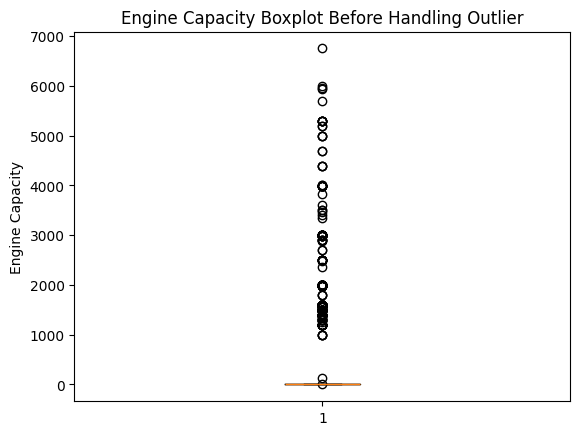

In [42]:
# Plot a boxplot for engine_capacity
plt.boxplot(df['engine_capacity'].dropna())
plt.title('Engine Capacity Boxplot Before Handling Outlier')
plt.ylabel('Engine Capacity')
plt.show()

replace the higher outlier values




In [43]:
print("Rows 1000 to 1010 before handling outliers:")
print(df.loc[1000:1010, ['engine_capacity']])


# Function to handle outliers in engine_capacity
def handle_outliers(engine_capacity):
    if engine_capacity > 1000:  # If the number is larger than 1000, treat it as an outlier
        transformed_value = engine_capacity / 1000  # Convert to fractional form (e.g., 3995 -> 3.995)
        return round(transformed_value, 1)  # Round to one decimal place (e.g., 3.995 -> 3.9)
    return engine_capacity  # Return original value if not an outlier

df['engine_capacity'] = df['engine_capacity'].apply(handle_outliers)

# Display rows from 1000 to 1010 to verify the changes
print("Rows 1000 to 1010 after handling outliers:")
print(df.loc[1000:1015, ['engine_capacity']])

Rows 1000 to 1010 before handling outliers:
      engine_capacity
1000           3982.0
1001           1991.0
1002           1600.0
1003           1598.0
1004           5200.0
1005           1498.0
1006           1498.0
1007           3982.0
1008              NaN
1009           1598.0
1010           1600.0
Rows 1000 to 1010 after handling outliers:
      engine_capacity
1000              4.0
1001              2.0
1002              1.6
1003              1.6
1004              5.2
1005              1.5
1006              1.5
1007              4.0
1008              NaN
1009              1.6
1010              1.6
1011              1.6
1012              1.6
1013              1.5
1014              1.8
1015              1.6


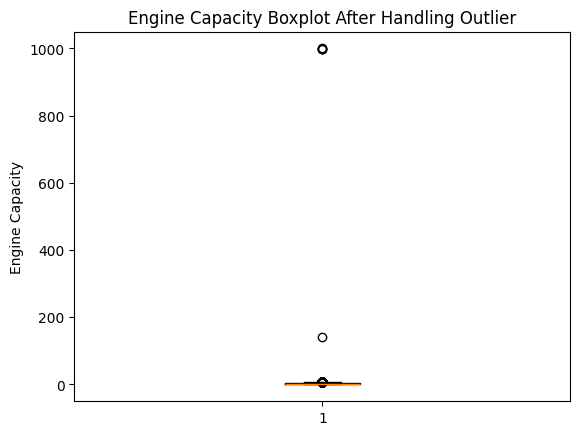

In [44]:
# Plot a boxplot for engine_capacity
plt.boxplot(df['engine_capacity'].dropna())
plt.title('Engine Capacity Boxplot After Handling Outlier')
plt.ylabel('Engine Capacity')
plt.show()

In [45]:
print("Rows 1000 to 1010 after handling outliers:")
print(df.loc[1000:1015, ['engine_capacity']])

Rows 1000 to 1010 after handling outliers:
      engine_capacity
1000              4.0
1001              2.0
1002              1.6
1003              1.6
1004              5.2
1005              1.5
1006              1.5
1007              4.0
1008              NaN
1009              1.6
1010              1.6
1011              1.6
1012              1.6
1013              1.5
1014              1.8
1015              1.6


In [46]:
# Define the range for valid engine capacities (0 to 8 for traditional cars)
valid_min = 0
valid_max = 8
# Replace outlier values with NaN
df.loc[(df['engine_capacity'] < valid_min) | (df['engine_capacity'] > valid_max), 'engine_capacity'] = np.nan

print(f"Number of NaN values in engine_capacity after replacing outliers: {df['engine_capacity'].isnull().sum()}")

print(df['engine_capacity'].describe())

Number of NaN values in engine_capacity after replacing outliers: 8
count    6296.000000
mean        2.818043
std         1.364821
min         0.000000
25%         2.000000
50%         2.500000
75%         3.600000
max         8.000000
Name: engine_capacity, dtype: float64


In [47]:
# Group by `car name` and replace inconsistent values with the median for each group
df['engine_capacity'] = df['engine_capacity'].fillna(df.groupby('car name')['engine_capacity'].transform('median'))
# code from: https://devskrol.com/2022/01/25/imputation-of-missing-data/

In [48]:
# then replace missing `engine_capacity` values with the median engine_capacity for each brand
df['engine_capacity'] = df['engine_capacity'].fillna(df.groupby('brand')['engine_capacity'].transform('median'))

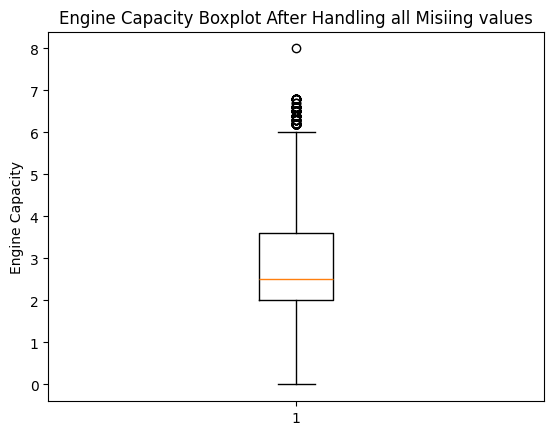

In [49]:
# Plot a boxplot for engine_capacity
plt.boxplot(df['engine_capacity'].dropna())
plt.title('Engine Capacity Boxplot After Handling all Misiing values')
plt.ylabel('Engine Capacity')
plt.show()

In [50]:
df.isnull().sum()

,0
car name,0
price_usd,0
engine_capacity,0
cylinder,734
horse_power,122
top_speed,0
seats,0
brand,0
country,0


 #### **handle the cylinders column**

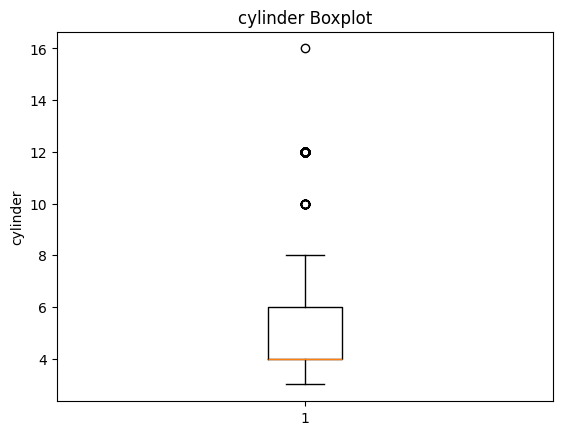

In [51]:
# Plot a boxplot
plt.boxplot(df['cylinder'].dropna())
plt.title('cylinder Boxplot')
plt.ylabel('cylinder')
plt.show()

In [52]:
print(df['cylinder'].describe())

count    5570.000000
mean        5.393178
std         1.878560
min         3.000000
25%         4.000000
50%         4.000000
75%         6.000000
max        16.000000
Name: cylinder, dtype: float64


In [53]:
# Group by `car name` and replace inconsistent values with the median for each group
df['cylinder'] = df['cylinder'].fillna(df.groupby('car name')['cylinder'].transform('median'))

In [54]:
# Handle missing values in the `cylinder` column based on `engine_capacity`
df.loc[(df['engine_capacity'] == 0) & (df['cylinder'].isna()), 'cylinder'] = 0

# show how many cylinders are now 0
ev_count = df[df['cylinder'] == 0].shape[0]
print(f"Number of records updated for EVs with 0 cylinders: {ev_count}")

missing_cylinders = df['cylinder'].isnull().sum()
print(f"Number of missing values remaining in cylinder column: {missing_cylinders}")

Number of records updated for EVs with 0 cylinders: 110
Number of missing values remaining in cylinder column: 624


In [55]:
# then replace missing `cylinder` values with the median cylinder for each brand
df['cylinder'] = df['cylinder'].fillna(df.groupby('brand')['cylinder'].transform('median'))

In [56]:
df.isnull().sum()

,0
car name,0
price_usd,0
engine_capacity,0
cylinder,0
horse_power,122
top_speed,0
seats,0
brand,0
country,0


In [57]:
# replace the categorical feature to numerical
df_cars_corr=df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical feature
df_cars_corr['brand_encoded'] = label_encoder.fit_transform(df_cars_corr['brand'])

# Drop categorical features
df_cars_corr.drop(columns='car name', inplace=True)
df_cars_corr.drop(columns='seats', inplace=True)
df_cars_corr.drop(columns='country', inplace=True)
df_cars_corr.drop(columns='brand', inplace=True)
df_cars_corr.drop(columns='top_speed', inplace=True)


df_cars_corr.corr()

,price_usd,engine_capacity,cylinder,horse_power,brand_encoded
price_usd,1.000000,0.356681,0.446508,0.629488,-0.063934
engine_capacity,0.356681,1.000000,0.868971,0.590964,-0.101375
cylinder,0.446508,0.868971,1.000000,0.665380,-0.144345
horse_power,0.629488,0.590964,0.665380,1.000000,-0.124866
brand_encoded,-0.063934,-0.101375,-0.144345,-0.124866,1.000000


 #### **handle the horse_power column**

In [58]:
df[['horse_power', 'cylinder']].head(20)

,horse_power,cylinder
0,NaN,0.0
1,180.0,4.0
2,102.0,4.0
3,420.0,4.0
4,140.0,4.0
5,140.0,4.0
6,120.0,4.0
7,120.0,4.0
8,170.0,4.0
9,542.0,6.0


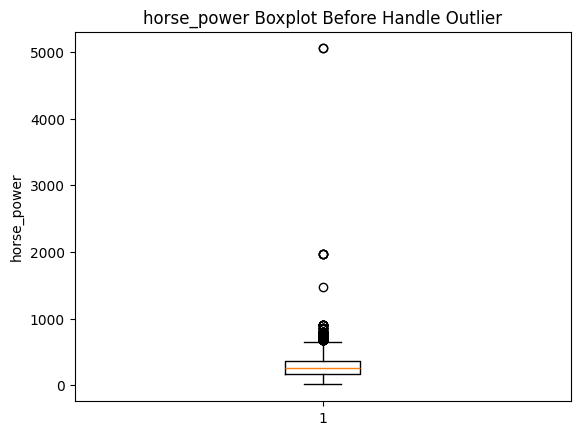

In [59]:
# Plot a boxplot
plt.boxplot(df['horse_power'].dropna())
plt.title('horse_power Boxplot Before Handle Outlier')
plt.ylabel('horse_power')
plt.show()

In [60]:
# Group by `car name` and replace inconsistent values with the median for each group
df['horse_power'] = df['horse_power'].fillna(df.groupby('car name')['horse_power'].transform('median'))

In [61]:
# the range for horse power (60 to 2500)
valid_min = 60
valid_max = 2500

# Replace outlier values with NaN
df.loc[(df['horse_power'] < valid_min) | (df['horse_power'] > valid_max), 'horse_power'] = np.nan

print(f"Number of NaN values in horse_power after replacing outliers: {df['horse_power'].isnull().sum()}")

print(df['horse_power'].describe())

df.isnull().sum()

Number of NaN values in horse_power after replacing outliers: 131
count    6173.000000
mean      291.131379
std       157.732999
min        65.000000
25%       168.000000
50%       255.000000
75%       367.000000
max      1973.000000
Name: horse_power, dtype: float64


,0
car name,0
price_usd,0
engine_capacity,0
cylinder,0
horse_power,131
top_speed,0
seats,0
brand,0
country,0


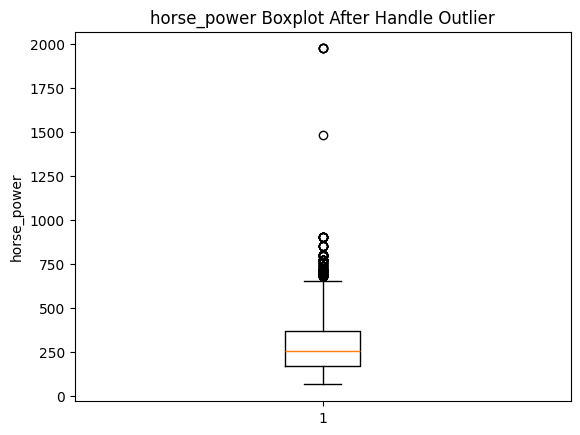

In [62]:
# Plot a boxplot
plt.boxplot(df['horse_power'].dropna())
plt.title('horse_power Boxplot After Handle Outlier')
plt.ylabel('horse_power')
plt.show()

In [63]:
# then replace missing `horse_power` values with the median horse_power for each brand
df['horse_power'] = df['horse_power'].fillna(df.groupby('brand')['horse_power'].transform('median'))

In [64]:
df[['horse_power', 'cylinder']].head()

,horse_power,cylinder
0,100.0,0.0
1,180.0,4.0
2,102.0,4.0
3,420.0,4.0
4,140.0,4.0


In [65]:
# replace the categorical feature to numerical
from sklearn.preprocessing import LabelEncoder

# create a copy of the original DataFrame to mainting the original DataFrame
df_cars_corr=df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical feature
df_cars_corr['brand_encoded'] = label_encoder.fit_transform(df_cars_corr['brand'])

# Drop categorical features
df_cars_corr.drop(columns='car name', inplace=True)
df_cars_corr.drop(columns='seats', inplace=True)
df_cars_corr.drop(columns='country', inplace=True)
df_cars_corr.drop(columns='brand', inplace=True)
df_cars_corr.drop(columns='top_speed', inplace=True)

df_cars_corr.corr()

,price_usd,engine_capacity,cylinder,horse_power,brand_encoded
price_usd,1.000000,0.356681,0.446508,0.723300,-0.063934
engine_capacity,0.356681,1.000000,0.868971,0.669838,-0.101375
cylinder,0.446508,0.868971,1.000000,0.703518,-0.144345
horse_power,0.723300,0.669838,0.703518,1.000000,-0.125526
brand_encoded,-0.063934,-0.101375,-0.144345,-0.125526,1.000000


In [66]:
df.isnull().sum()

,0
car name,0
price_usd,0
engine_capacity,0
cylinder,0
horse_power,0
top_speed,0
seats,0
brand,0
country,0


 #### **handle the top_speed column**

In [67]:
df[['top_speed', 'seats']].head(20)

,top_speed,seats
0,Automatic,150
1,8 Seater,8.8
2,145,4 Seater
3,4 Seater,7.5
4,190,5 Seater
5,190,5 Seater
6,170,N A
7,170,N A
8,199,5 Seater
9,5 Seater,6.9


In [68]:
# Function to process the top_speed and seats columns
def process_columns(row):
    # If "Seater" pattern exists in top_speed, move it to seats
    if isinstance(row['top_speed'], str) and 'Seater' in row['top_speed']:
        row['seats'] = row['top_speed']
        row['top_speed'] = np.nan

    # If the seats value is numeric and greater than 80, move it to top_speed
    if isinstance(row['seats'], str) and row['seats'].replace('.', '', 1).isdigit():
        if float(row['seats']) > 80:
            row['top_speed'] = row['seats']
            row['seats'] = np.nan

    return row

df = df.apply(process_columns, axis=1)

df[['top_speed', 'seats']].head(20)

,top_speed,seats
0,150,NaN
1,NaN,8 Seater
2,145,4 Seater
3,NaN,4 Seater
4,190,5 Seater
5,190,5 Seater
6,170,N A
7,170,N A
8,199,5 Seater
9,NaN,5 Seater


In [69]:
df.isnull().sum()

,0
car name,0
price_usd,0
engine_capacity,0
cylinder,0
horse_power,0
top_speed,281
seats,75
brand,0
country,0


In [70]:
# Function to clean the top_speed column
def clean_top_speed(speed):
    if isinstance(speed, str):  # Ensure it's a string
        speed = speed.strip()  # Remove leading/trailing spaces
        if speed.isdigit():  # Check if it's a purely numeric value
            return int(speed)  # Convert to integer
    return None  # Replace non-numeric entries with None

# Apply the function to the top_speed column
df['top_speed'] = df['top_speed'].apply(clean_top_speed)

# Verify the results
print(df['top_speed'].isnull().sum(), "invalid entries replaced with None")
print(df['top_speed'].notnull().sum(), "valid entries retained")
df[['top_speed', 'seats']].head(20)

358 invalid entries replaced with None
5946 valid entries retained


,top_speed,seats
0,150.0,NaN
1,NaN,8 Seater
2,145.0,4 Seater
3,NaN,4 Seater
4,190.0,5 Seater
5,190.0,5 Seater
6,170.0,N A
7,170.0,N A
8,199.0,5 Seater
9,NaN,5 Seater


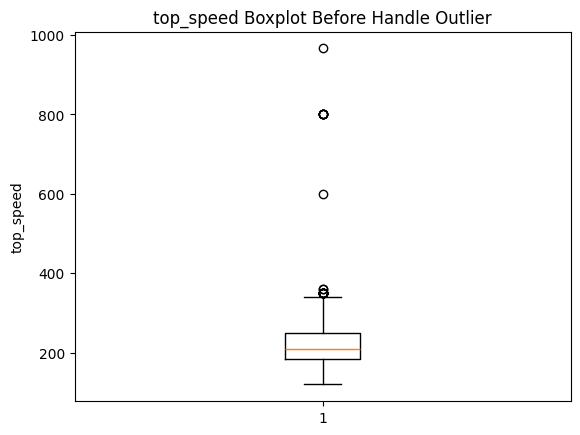

In [71]:
# Plot a boxplot
plt.boxplot(df['top_speed'].dropna())
plt.title('top_speed Boxplot Before Handle Outlier')
plt.ylabel('top_speed')
plt.show()

In [72]:
# Group by `car name` and replace inconsistent values with the median for each group
df['top_speed'] = df['top_speed'].fillna(df.groupby('car name')['top_speed'].transform('median'))

In [73]:
# Define the range for valid top_speed (80 to 500)
valid_min = 80
valid_max = 500
# Replace outlier values with NaN
df.loc[(df['top_speed'] < valid_min) | (df['top_speed'] > valid_max), 'top_speed'] = np.nan

print(f"Number of NaN values in top_speed after replacing outliers: {df['top_speed'].isnull().sum()}")

print(df['top_speed'].describe())


Number of NaN values in top_speed after replacing outliers: 363
count    5941.000000
mean      220.528362
std        42.374867
min       120.000000
25%       185.000000
50%       210.000000
75%       250.000000
max       360.000000
Name: top_speed, dtype: float64


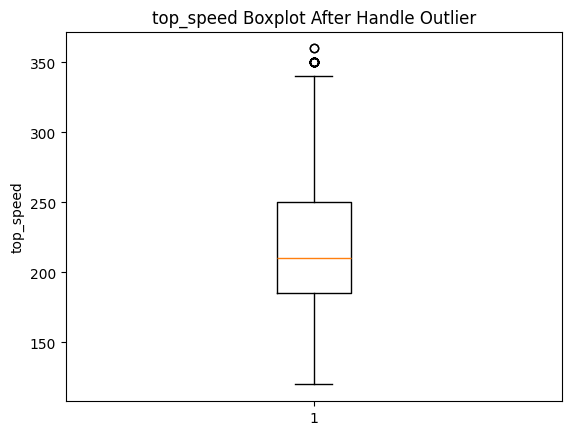

In [74]:
# Plot a boxplot
plt.boxplot(df['top_speed'].dropna())
plt.title('top_speed Boxplot After Handle Outlier')
plt.ylabel('top_speed')
plt.show()

In [75]:
# create a copy of the original DataFrame to mainting the original DataFrame
df_cars_corr=df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical feature
df_cars_corr['brand_encoded'] = label_encoder.fit_transform(df_cars_corr['brand'])

# Drop categorical features
df_cars_corr.drop(columns='car name', inplace=True)
df_cars_corr.drop(columns='seats', inplace=True)
df_cars_corr.drop(columns='country', inplace=True)
df_cars_corr.drop(columns='brand', inplace=True)

df_cars_corr.corr()

,price_usd,engine_capacity,cylinder,horse_power,top_speed,brand_encoded
price_usd,1.000000,0.356681,0.446508,0.723300,0.527707,-0.063934
engine_capacity,0.356681,1.000000,0.868971,0.669838,0.358997,-0.101375
cylinder,0.446508,0.868971,1.000000,0.703518,0.490727,-0.144345
horse_power,0.723300,0.669838,0.703518,1.000000,0.734263,-0.125526
top_speed,0.527707,0.358997,0.490727,0.734263,1.000000,-0.110085
brand_encoded,-0.063934,-0.101375,-0.144345,-0.125526,-0.110085,1.000000


In [76]:
# replace remaining missing `top_speed` values based on the mean top_speed for each brand
df['top_speed'] = df['top_speed'].fillna(df.groupby('brand')['top_speed'].transform('mean'))

In [77]:
df.isnull().sum()

,0
car name,0
price_usd,0
engine_capacity,0
cylinder,0
horse_power,0
top_speed,15
seats,75
brand,0
country,0


In [78]:
# Filter the DataFrame for rows where 'top_speed' is NaN
nan_top_speed_records = df[df['top_speed'].isna()]
nan_top_speed_records

,car name,price_usd,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
1096,Brilliance V6 2021 1.5T Grand Deluxe,11036,1.5,4.0,220.0,NaN,5 Seater,brilliance,egypt
1101,Brilliance V6 2021 1.5T Flagship,11836,1.5,4.0,220.0,NaN,5 Seater,brilliance,egypt
1102,Brilliance V6 2021 1.5T Deluxe,10268,1.5,4.0,220.0,NaN,5 Seater,brilliance,egypt
2052,Morgan Plus 4 2021 2.0L,84535,2.0,4.0,201.0,NaN,7.5,morgan,bahrain
2068,Morgan Plus 8 2021 4.8L Manual,87980,4.8,8.0,490.0,NaN,4.5,morgan,bahrain
2207,Morgan Aero 8 2021 4.8L Manual,140450,4.8,8.0,490.0,NaN,4.5,morgan,bahrain
3035,Morgan Plus 4 2021 2.0L,85320,2.0,4.0,201.0,NaN,7.5,morgan,qatar
3045,Morgan Plus 8 2021 4.8L Manual,88830,4.8,8.0,490.0,NaN,4.5,morgan,qatar
3156,Morgan Aero 8 2021 4.8L Manual,141750,4.8,8.0,490.0,NaN,4.5,morgan,qatar
3913,Morgan Plus 4 2021 2.0L,82940,2.0,4.0,201.0,NaN,7.5,morgan,oman


In [79]:
brilliance_records = df[df['brand'] == 'morgan']
brilliance_records

,car name,price_usd,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
2052,Morgan Plus 4 2021 2.0L,84535,2.0,4.0,201.0,NaN,7.5,morgan,bahrain
2068,Morgan Plus 8 2021 4.8L Manual,87980,4.8,8.0,490.0,NaN,4.5,morgan,bahrain
2207,Morgan Aero 8 2021 4.8L Manual,140450,4.8,8.0,490.0,NaN,4.5,morgan,bahrain
3035,Morgan Plus 4 2021 2.0L,85320,2.0,4.0,201.0,NaN,7.5,morgan,qatar
3045,Morgan Plus 8 2021 4.8L Manual,88830,4.8,8.0,490.0,NaN,4.5,morgan,qatar
3156,Morgan Aero 8 2021 4.8L Manual,141750,4.8,8.0,490.0,NaN,4.5,morgan,qatar
3913,Morgan Plus 4 2021 2.0L,82940,2.0,4.0,201.0,NaN,7.5,morgan,oman
3936,Morgan Plus 8 2021 4.8L Manual,86320,4.8,8.0,490.0,NaN,4.5,morgan,oman
4053,Morgan Aero 8 2021 4.8L Manual,137800,4.8,8.0,490.0,NaN,4.5,morgan,oman
4855,Morgan Plus 8 2021 4.8L Manual,85020,4.8,8.0,490.0,NaN,4.5,morgan,kuwait


In [80]:
# Drop rows where 'top_speed' is NaN
df = df.dropna(subset=['top_speed'])

 #### **handle the seats column**

In [81]:
df['seats'].head(15)

,seats
0,NaN
1,8 Seater
2,4 Seater
3,4 Seater
4,5 Seater
5,5 Seater
6,N A
7,N A
8,5 Seater
9,5 Seater


In [82]:
# Function to clean the 'seats' column
def clean_seats(seat):
    # Check if the value is a string and contains "Seater"
    if isinstance(seat, str) and "Seater" in seat:
        return seat  # Keep the value as it is
    else:
        return np.nan  # Replace non-matching values with NaN

df['seats'] = df['seats'].apply(clean_seats)

print(f"Number of NaN values in 'seats' column: {df['seats'].isnull().sum()}")

Number of NaN values in 'seats' column: 224


<ipython-input-82-900bbbce24a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seats'] = df['seats'].apply(clean_seats)


In [83]:
df['seats'].head(15)

,seats
0,NaN
1,8 Seater
2,4 Seater
3,4 Seater
4,5 Seater
5,5 Seater
6,NaN
7,NaN
8,5 Seater
9,5 Seater


In [84]:
# extract only the number from the 'seats' column
def extract_seats_number(seat):
    if isinstance(seat, str) and "Seater" in seat:
        return int(seat.split()[0])  # Extract the number before "Seater"
    return np.nan  # Keep NaN for missing values

df['seats'] = df['seats'].apply(extract_seats_number)

df['seats'].head()

,seats
0,NaN
1,8.0
2,4.0
3,4.0
4,5.0


In [85]:
# Replace missing `seats` based on the median seats for each car name
df['seats'] = df['seats'].fillna(df.groupby('car name')['seats'].transform('median'))

In [86]:
# Replace missing `seats` values with the median seats for each brand
df['seats'] = df['seats'].fillna(df.groupby('brand')['seats'].transform('median'))

df[['brand', 'seats']].head(10)
# code from: https://devskrol.com/2022/01/25/imputation-of-missing-data/

,brand,seats
0,fiat,4.0
1,peugeot,8.0
2,suzuki,4.0
3,ford,4.0
4,honda,5.0
5,honda,5.0
6,peugeot,5.0
7,peugeot,5.0
8,renault,5.0
9,ford,5.0


In [87]:
# Display rows where the 'seats' column has missing values (NaN)
missing_seats = df[df['seats'].isnull()]
missing_seats.head(20)

,car name,price_usd,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
1112,Soueast DX7 2021 1.8T Prime,11520,1.5,4.0,195.0,180.0,NaN,soueast,egypt
1188,Lada Granta Sedan 2021 1.6L A/T LB,6144,1.6,4.0,98.0,176.0,NaN,lada,egypt
1194,Lada Granta Sedan 2021 1.6L A/T,5856,1.6,4.0,98.0,176.0,NaN,lada,egypt
1205,Lada Granta Sedan 2021 1.6L M/T,5216,1.6,4.0,87.0,172.0,NaN,lada,egypt
4183,Soueast DX7 2021 1.8T Prime,20437,1.5,4.0,195.0,180.0,NaN,soueast,kuwait
5277,Soueast DX3 2021 1.5T Full Option,18887,1.5,4.0,155.0,180.0,NaN,soueast,uae
5409,Soueast DX7 2021 1.8T Prime,24705,1.5,4.0,195.0,180.0,NaN,soueast,uae


In [88]:
# default seat values for each brand from google
default_seats = {
    'soueast': 5,  # Most Soueast cars are 5-seaters
    'lada': 5,     # Most Lada models are 5-seaters
}

# Fill missing values in the 'seats' column based on the brand
df['seats'] = df.apply(
    lambda row: default_seats[row['brand']] if pd.isnull(row['seats']) and row['brand'] in default_seats else row['seats'],
    axis=1
)

In [89]:
df.isnull().sum()

,0
car name,0
price_usd,0
engine_capacity,0
cylinder,0
horse_power,0
top_speed,0
seats,0
brand,0
country,0


In [90]:
df['top_speed'] = df['top_speed'].astype(int)
df['seats'] = df['seats'].astype(int)
df['horse_power'] = df['horse_power'].astype(int)
df['cylinder'] = df['cylinder'].astype(int)

Save the clean data :

In [91]:
df.head()

,car name,price_usd,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
0,Fiat 500e 2021 La Prima,18144,0.0,0,100,150,4,fiat,ksa
1,Peugeot Traveller 2021 L3 VIP,37955,2.0,4,180,201,8,peugeot,ksa
2,Suzuki Jimny 2021 1.5L Automatic,26671,1.5,4,102,145,4,suzuki,ksa
3,Ford Bronco 2021 2.3T Big Bend,53460,2.3,4,420,185,4,ford,ksa
4,Honda HR-V 2021 1.8 i-VTEC LX,27761,1.8,4,140,190,5,honda,ksa


In [92]:
# Save the dataframe to a CSV file
df.to_csv('clean_cars.csv', index=False)

## **Encoding categorical features**

In [93]:
cars_Data = pd.read_csv('clean_cars.csv')
df = pd.DataFrame(cars_Data)
df.head()
print(f"Data Set shape = {df.shape} \n")
print(df.info())
print("\n")
df.isnull().sum()

Data Set shape = (6289, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6289 entries, 0 to 6288
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car name         6289 non-null   object 
 1   price_usd        6289 non-null   int64  
 2   engine_capacity  6289 non-null   float64
 3   cylinder         6289 non-null   int64  
 4   horse_power      6289 non-null   int64  
 5   top_speed        6289 non-null   int64  
 6   seats            6289 non-null   int64  
 7   brand            6289 non-null   object 
 8   country          6289 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 442.3+ KB
None




,0
car name,0
price_usd,0
engine_capacity,0
cylinder,0
horse_power,0
top_speed,0
seats,0
brand,0
country,0


In [94]:
df.head(10)

,car name,price_usd,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
0,Fiat 500e 2021 La Prima,18144,0.0,0,100,150,4,fiat,ksa
1,Peugeot Traveller 2021 L3 VIP,37955,2.0,4,180,201,8,peugeot,ksa
2,Suzuki Jimny 2021 1.5L Automatic,26671,1.5,4,102,145,4,suzuki,ksa
3,Ford Bronco 2021 2.3T Big Bend,53460,2.3,4,420,185,4,ford,ksa
4,Honda HR-V 2021 1.8 i-VTEC LX,27761,1.8,4,140,190,5,honda,ksa
5,Honda HR-V 2021 1.8 i-VTEC EX,25740,1.8,4,140,190,5,honda,ksa
6,Peugeot Expert 2021 Van L3 A/T,22368,2.0,4,120,170,5,peugeot,ksa
7,Peugeot Expert 2021 Van L3 M/T,20667,2.0,4,120,170,5,peugeot,ksa
8,Renault Koleos 2021 2.5L LE (4WD),31563,2.5,4,170,199,5,renault,ksa
9,Ford Bronco 2021 2.7T Outer Banks,64260,2.7,6,542,185,5,ford,ksa


In [95]:
car_name_counts = df['car name'].value_counts()
print(car_name_counts)


car name
Mercedes-Benz C-Class 2022 C 300               10
Fiat 500e 2021 La Prima                         7
Chevrolet Equinox 2021 1.5T LS (FWD)            7
Nissan Pathfinder 2022 3.5L SL 4WD              7
Mini Hatch 2021 5-Door Cooper                   7
                                               ..
Aston Martin Vantage 2021 V8 A/T                1
Skoda Superb 2021 2.0 TSI Style Plus            1
Dodge Charger 2021 3.6L SXT premium             1
Aston Martin Vantage 2021 V8 M/T                1
Lamborghini Aventador Ultimae 2022 LP 780-4     1
Name: count, Length: 2539, dtype: int64


In [96]:
car_records = df[df['car name'] == 'Mercedes-Benz C-Class 2022 C 300']

car_records


,car name,price_usd,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
741,Mercedes-Benz C-Class 2022 C 300,103335,2.0,4,255,209,5,mercedes-benz,ksa
1056,Mercedes-Benz C-Class 2022 C 300,103335,2.0,4,255,209,5,mercedes-benz,egypt
1123,Mercedes-Benz C-Class 2022 C 300,103335,2.0,4,255,209,5,mercedes-benz,egypt
1842,Mercedes-Benz C-Class 2022 C 300,103335,2.0,4,255,209,5,mercedes-benz,bahrain
2788,Mercedes-Benz C-Class 2022 C 300,103335,2.0,4,255,209,5,mercedes-benz,qatar
3701,Mercedes-Benz C-Class 2022 C 300,103335,2.0,4,255,209,5,mercedes-benz,oman
4646,Mercedes-Benz C-Class 2022 C 300,103335,2.0,4,255,209,5,mercedes-benz,kuwait
4661,Mercedes-Benz C-Class 2022 C 300,103335,2.0,4,255,209,5,mercedes-benz,kuwait
5805,Mercedes-Benz C-Class 2022 C 300,103335,2.0,4,255,209,5,mercedes-benz,uae
5820,Mercedes-Benz C-Class 2022 C 300,103335,2.0,4,255,209,5,mercedes-benz,uae


In [97]:
# Remove fully duplicate rows
df.drop_duplicates(inplace=True)
df.shape


(6273, 9)

**Start encode catagorical features**

In [98]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical feature
df['brand_encoded'] = label_encoder.fit_transform(df['brand'])
df['country_encoded'] = label_encoder.fit_transform(df['country'])

# Drop the original categorical columns if desired
cars_data_encoded = df.drop(['car name','brand', 'country'], axis=1)
print("\nData after encoding:")
cars_data_encoded.head()


Data after encoding:


,price_usd,engine_capacity,cylinder,horse_power,top_speed,seats,brand_encoded,country_encoded
0,18144,0.0,0,100,150,4,23,2
1,37955,2.0,4,180,201,8,59,2
2,26671,1.5,4,102,145,4,70,2
3,53460,2.3,4,420,185,4,24,2
4,27761,1.8,4,140,190,5,31,2


## **Normalizing/standardizing numerical features**

In [99]:
# Identify numerical features for standardization (without the target variable 'price_usd')
numerical_features = ['price_usd', 'engine_capacity', 'cylinder', 'horse_power', 'top_speed', 'seats']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical features
cars_data_encoded[numerical_features] = scaler.fit_transform(cars_data_encoded[numerical_features])

cars_data_encoded.head()

,price_usd,engine_capacity,cylinder,horse_power,top_speed,seats,brand_encoded,country_encoded
0,-0.519852,-2.061714,-2.711865,-1.211446,-1.654695,-0.667558,23,2
1,-0.327773,-0.597506,-0.660924,-0.704043,-0.463474,1.947644,59,2
2,-0.437178,-0.963558,-0.660924,-1.198761,-1.771481,-0.667558,70,2
3,-0.177443,-0.377874,-0.660924,0.818166,-0.837190,-0.667558,24,2
4,-0.426610,-0.743927,-0.660924,-0.957745,-0.720404,-0.013758,31,2


## **Splitting into training, validation, and test sets**

In [100]:
# Splitting the data to features (X) and target variable (y)
X = cars_data_encoded.drop('price_usd', axis=1)
y = cars_data_encoded['price_usd']

# Splitting into training, validation, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the sizes of the splits
split_sizes = {
    "Training Set": len(X_train),
    "Validation Set": len(X_validation),
    "Test Set": len(X_test)
}

split_sizes

{'Training Set': 3763, 'Validation Set': 1255, 'Test Set': 1255}

In [101]:
y_train.isnull().sum()

0

# **Exploratory Data Analysis (EDA)**

In [102]:
cars_data_encoded.head(20)

,price_usd,engine_capacity,cylinder,horse_power,top_speed,seats,brand_encoded,country_encoded
0,-0.519852,-2.061714,-2.711865,-1.211446,-1.654695,-0.667558,23,2
1,-0.327773,-0.597506,-0.660924,-0.704043,-0.463474,1.947644,59,2
2,-0.437178,-0.963558,-0.660924,-1.198761,-1.771481,-0.667558,70,2
3,-0.177443,-0.377874,-0.660924,0.818166,-0.837190,-0.667558,24,2
4,-0.426610,-0.743927,-0.660924,-0.957745,-0.720404,-0.013758,31,2
5,-0.446205,-0.743927,-0.660924,-0.957745,-0.720404,-0.013758,31,2
6,-0.478898,-0.597506,-0.660924,-1.084596,-1.187549,-0.013758,59,2
7,-0.495390,-0.597506,-0.660924,-1.084596,-1.187549,-0.013758,59,2
8,-0.389747,-0.231454,-0.660924,-0.767469,-0.510189,-0.013758,63,2
9,-0.072731,-0.085033,0.364546,1.591956,-0.837190,-0.013758,24,2


## **Distribution of the Target Variable**

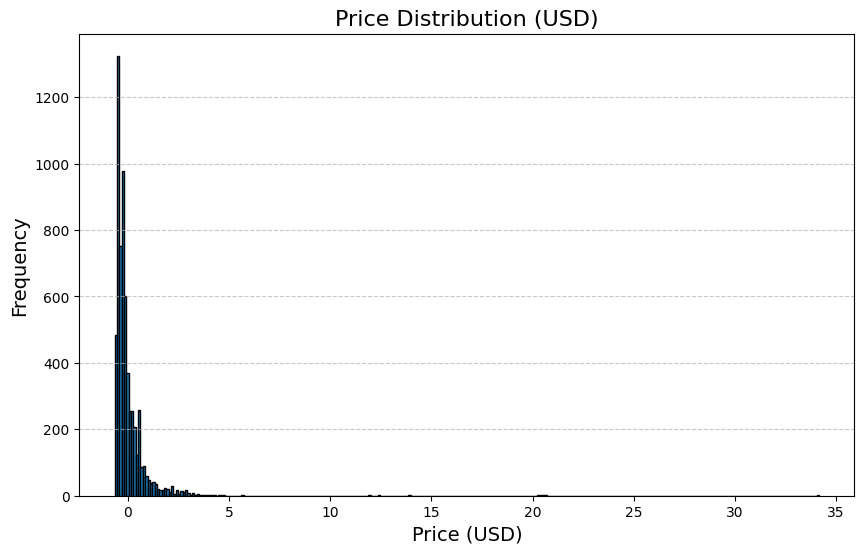

In [103]:
plt.figure(figsize=(10, 6))
plt.hist(cars_data_encoded['price_usd'], bins=300, edgecolor='black')
plt.title('Price Distribution (USD)', fontsize=16)
plt.xlabel('Price (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='price_usd', ylabel='Count'>

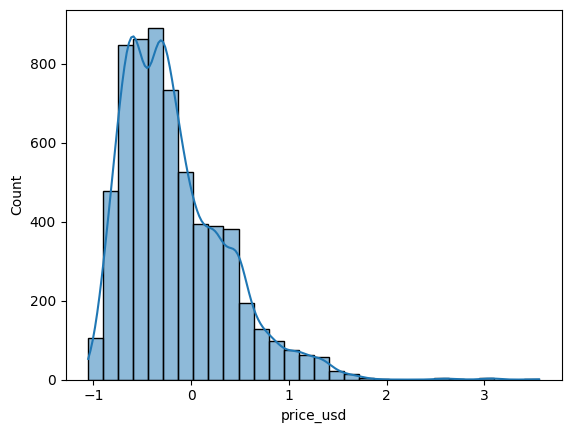

In [104]:
logPlot = np.log1p(cars_data_encoded['price_usd'])  # log1p to handle zero values
sns.histplot(logPlot, bins=30, kde=True)

In [105]:
print(y.describe())

count    6.273000e+03
mean     4.304260e-17
std      1.000080e+00
min     -6.510914e-01
25%     -4.346474e-01
50%     -2.531464e-01
75%      1.314575e-01
max      3.415977e+01
Name: price_usd, dtype: float64


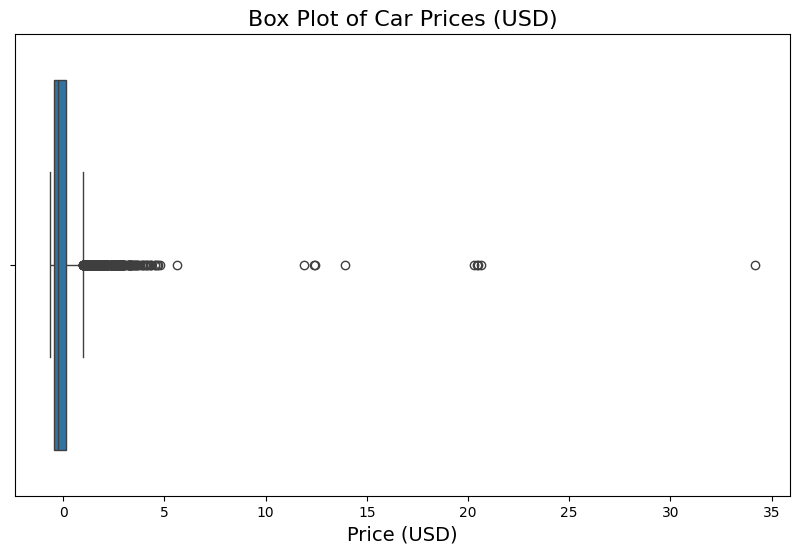

In [106]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=cars_data_encoded['price_usd'])
plt.title('Box Plot of Car Prices (USD)', fontsize=16)
plt.xlabel('Price (USD)', fontsize=14)
plt.show()

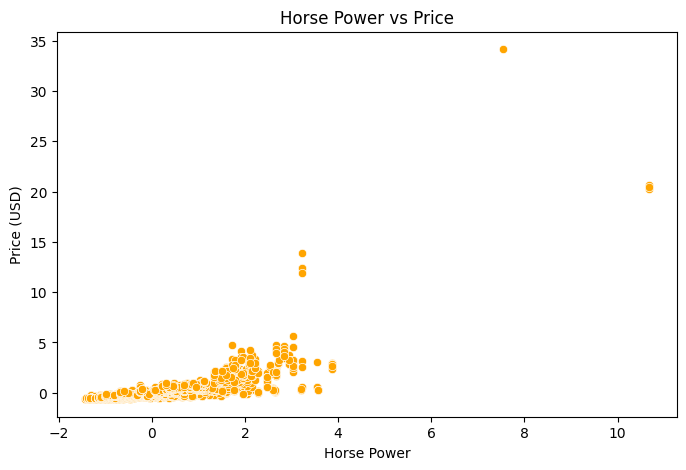

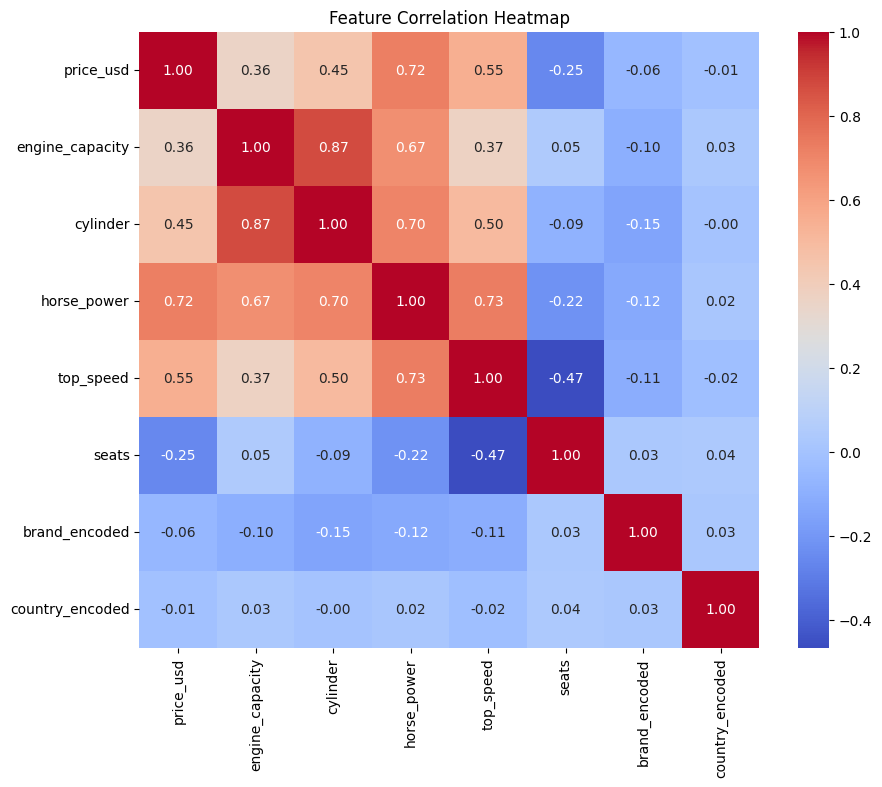

In [107]:
# Scatter plots for numerical features
plt.figure(figsize=(8, 5))
sns.scatterplot(x=cars_data_encoded['horse_power'], y=y, color='orange')
plt.title("Horse Power vs Price")
plt.xlabel("Horse Power")
plt.ylabel("Price (USD)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cars_data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


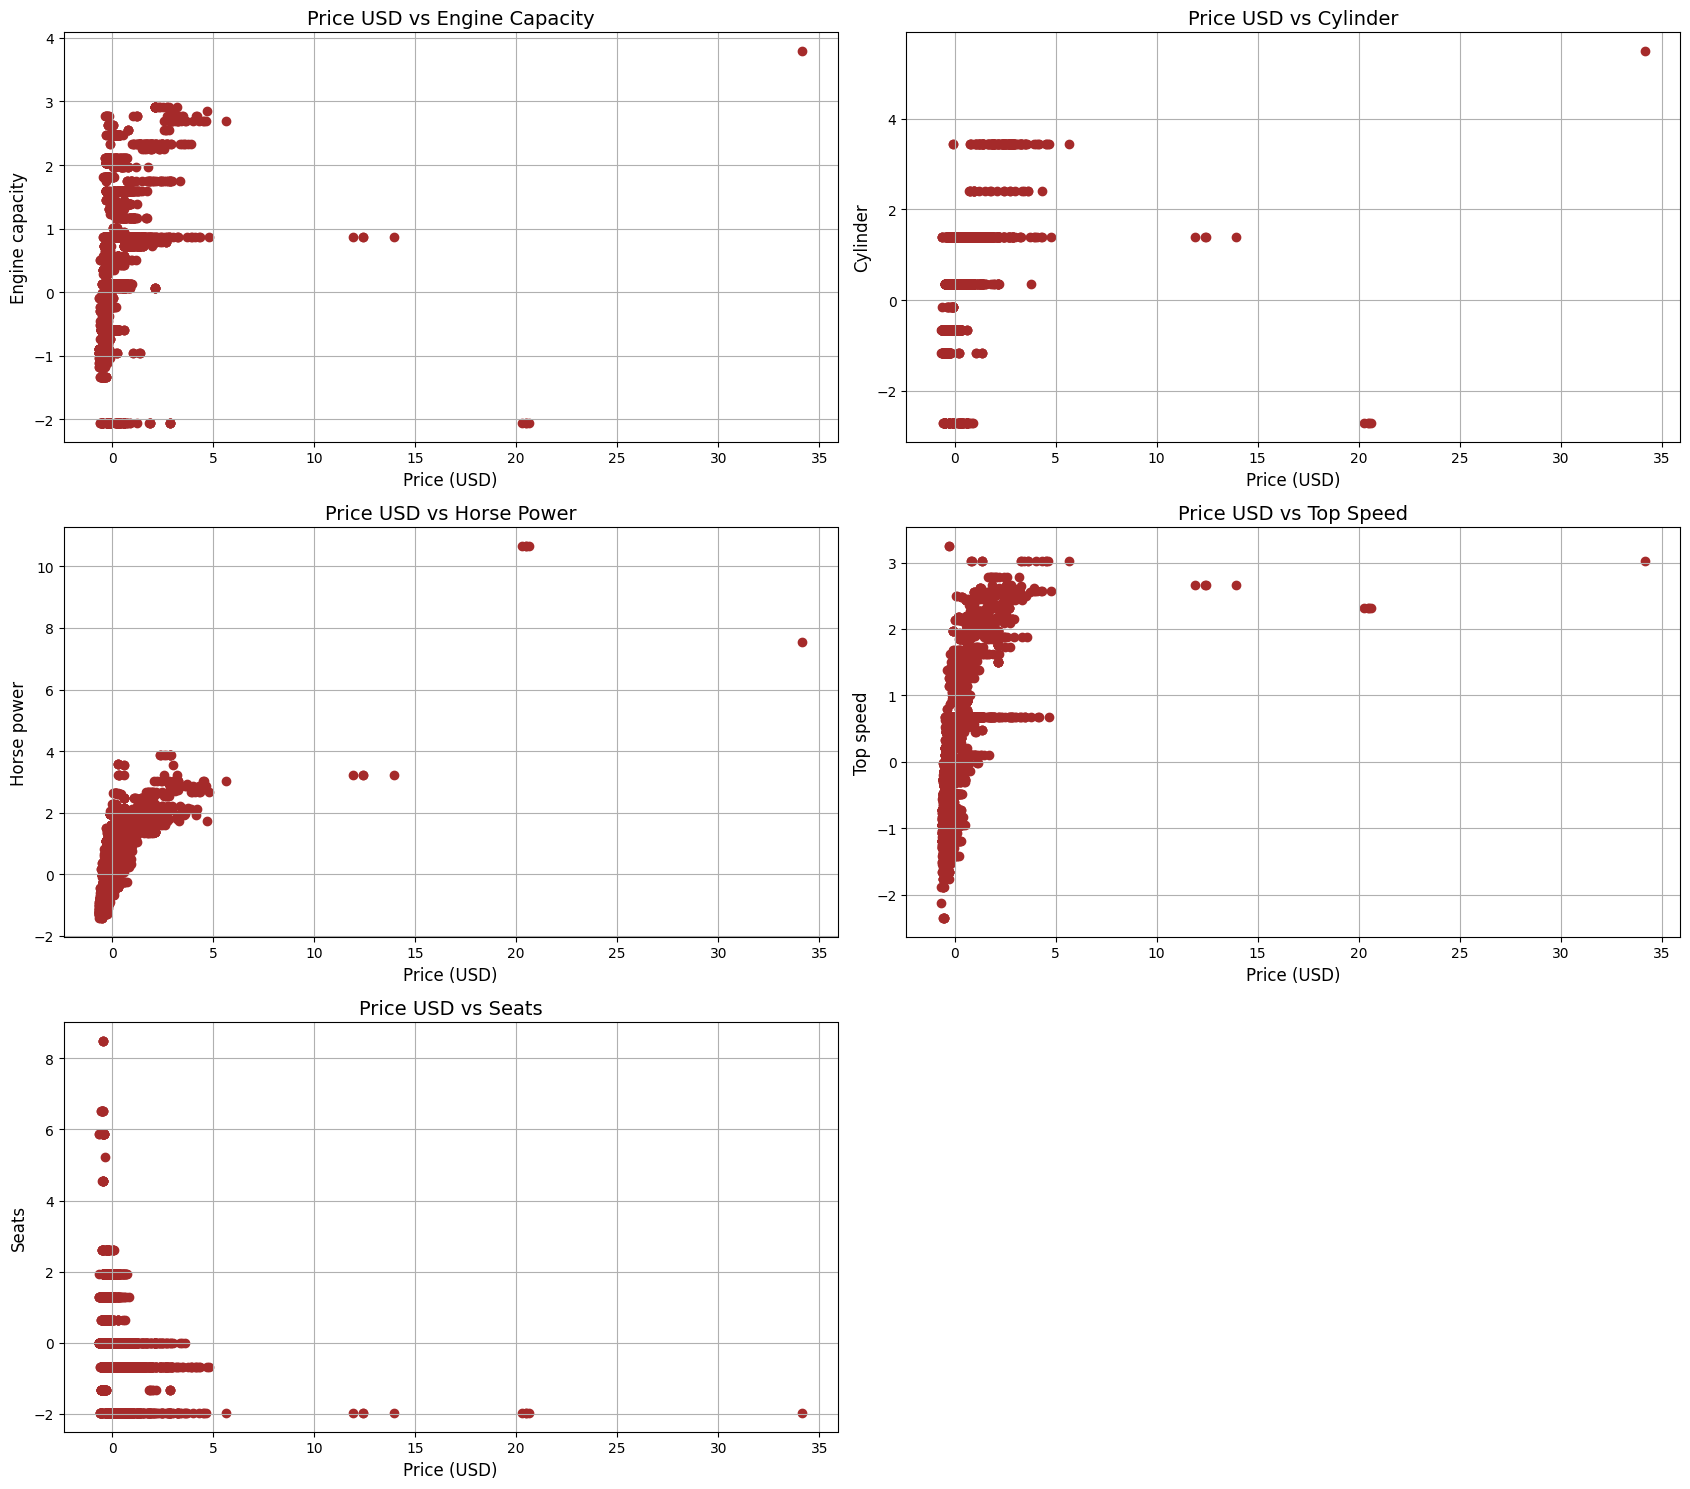

In [108]:
fig, axes = plt.subplots(3, 2, figsize=(17, 15))

titles = [
    ("Price USD vs Engine Capacity", "engine_capacity"),
    ("Price USD vs Cylinder", "cylinder"),
    ("Price USD vs Horse Power", "horse_power"),
    ("Price USD vs Top Speed", "top_speed"),
    ("Price USD vs Seats", "seats")
]

# Plot scatter plots
for ax, (title, feature) in zip(axes.flat, titles):
    ax.scatter(cars_data_encoded['price_usd'], cars_data_encoded[feature], color='brown')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Price (USD)", fontsize=12)
    ax.set_ylabel(feature.replace("_", " ").capitalize(), fontsize=12)
    ax.grid(True)

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

##### **Analysis of Relationships Between Car Price and Features**

The scatter plots provide insights into the relationships between **Price (USD)** and various car features, highlighting key trends and outliers.

**Price USD vs Engine Capacity**

  - The first plot reveals that cars with higher engine capacities tend to have higher prices. Most vehicles cluster around lower engine capacities and prices, with outliers representing high-performance or luxury cars. This indicates that engine capacity is a significant factor in determining price, especially for premium vehicles.

**Price USD vs Cylinder**

  - The second plot shows that the number of cylinders correlates with car price, with higher cylinder counts often associated with higher prices. However, the relationship is not perfectly linear, as certain lower-cylinder vehicles are priced similarly to higher-cylinder models. Outliers with very high prices and cylinder counts likely represent rare or specialized vehicles.

**Price USD vs Horse Power**

- In the third plot, a positive correlation is evident, as cars with greater horsepower generally command higher prices. Most cars fall within a lower horsepower range, with a few outliers showcasing extremely high horsepower and prices. This suggests that horsepower is a key performance metric influencing car pricing, particularly for sports and luxury models.

**Price USD vs Top Speed**

- The fourth plot highlights a similar trend, where higher top speeds are generally linked to higher prices. While most cars are clustered at lower speeds and prices, outliers with exceptionally high prices and top speeds are present. These vehicles are likely high-performance or exotic cars designed for speed enthusiasts.

**Price USD vs Seats**

- In contrast, the fifth plot shows that the number of seats has a weaker relationship with price compared to performance-related features. Most cars have a standard number of seats (4 or 5), regardless of price. However, cars with unusual seat configurations, such as very high or low seat counts, exhibit greater price variability. This indicates that the number of seats is less influential in determining price, but unconventional seating arrangements are more common in high-priced vehicles.

**Conclusion**

Overall, the scatter plots reveal that performance-related features, such as engine capacity, horsepower, top speed, and cylinder count, play a significant role in influencing car prices. Meanwhile, features like the number of seats have a weaker impact. Additionally, outliers in all plots represent luxury or exotic vehicles, highlighting the diversity in car pricing based on unique characteristics.

# **Building Regression Models**

## **Linear Models**

In [109]:
# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {
        "Mean Squared Error (MSE)": mse,
        "Mean Absolute Error (MAE)": mae,
        "R-squared": r2
    }

### **Closed-Form Solution**

In [110]:
# Closed-Form Solution for Linear Regression
def closed_form_solution(X, y):
    """
    Compute the weights for Linear Regression using the closed-form solution.
    """
    # Add a bias column to the feature matrix (X0 = 1)
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

    # Closed-form solution: w = (X^T * X)^-1 * X^T * y
    weights = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

    return weights

In [111]:
def predict_closed_form(X, weights):

    # Add a bias
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
    y_pred = X_bias @ weights

    return y_pred

In [112]:
# train the model using the closed-form solution
weights_closed_form = closed_form_solution(X_train, y_train)

# make predictions on the validation set
y_pred = predict_closed_form(X_validation, weights_closed_form)

# evaluate the model's performance
closed_form_performance_metrics = evaluate_model(y_validation, y_pred)

# show the performance metrics
print("Performance Metrics for Closed-Form Linear Regression:")
for metric, value in closed_form_performance_metrics.items():
    print(f"{metric}: {value}")


Performance Metrics for Closed-Form Linear Regression:
Mean Squared Error (MSE): 0.27810485386969264
Mean Absolute Error (MAE): 0.28474231042228376
R-squared: 0.6571672342982636


### **Gradient Descent Method**

In [113]:
# Ensure standardization of X_train and X_validation
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_validation_scal = scaler.transform(X_validation)
#X_test = scaler.transform(X_test)

In [114]:
def gradient_descent(X, y, learning_rate=0.01, max_iterations=1000):
    """
    Perform Linear Regression using Gradient Descent.
    """
    # Add a column of ones to X to account for the bias term (intercept)
    X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])

    # Initialize weights (including bias) to zeros
    n_features = X_with_bias.shape[1]
    weights = np.zeros(n_features)

    # Initialize a list to track MSE at each iteration
    mse_history = []

    # Perform Gradient Descent
    for iteration in range(max_iterations):
        # Calculate predictions
        predictions = X_with_bias @ weights

        # Compute residuals (errors)
        residuals = predictions - y

        # Calculate the gradient for weights
        gradient = (2 / X_with_bias.shape[0]) * (X_with_bias.T @ residuals)

        # Update weights using the gradient
        weights -= learning_rate * gradient

        # Calculate Mean Squared Error (MSE) for the current iteration
        mse = np.mean(residuals ** 2)
        mse_history.append(mse)

        # Print progress every 100 iterations
        if (iteration + 1) % 100 == 0:
            print(f"Iteration {iteration + 1}/{max_iterations}: MSE = {mse:.6f}")

    return weights, mse_history


In [115]:
def predict_gradient_descent(X, weights):
    # Add bias term to X
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
    y_pred = X_bias @ weights

    return y_pred


In [116]:
# train Gradient Descent Model
learning_rate = 0.01
iterations = 1000

weights_gd, mse_history = gradient_descent(X_train_scal, y_train, learning_rate, iterations)

# predict used the Gradient Descent
y_pred_gd = predict_gradient_descent(X_validation_scal, weights_gd)

# evaluate Gradient Descent Model
performance_gd = evaluate_model(y_validation, y_pred_gd)

print("\nGradient Descent Model Performance:")
for metric, value in performance_gd.items():
    print(f"{metric}: {value}")

Iteration 100/1000: MSE = 0.595672
Iteration 200/1000: MSE = 0.564519
Iteration 300/1000: MSE = 0.550013
Iteration 400/1000: MSE = 0.542363
Iteration 500/1000: MSE = 0.538084
Iteration 600/1000: MSE = 0.535602
Iteration 700/1000: MSE = 0.534125
Iteration 800/1000: MSE = 0.533228
Iteration 900/1000: MSE = 0.532673
Iteration 1000/1000: MSE = 0.532326

Gradient Descent Model Performance:
Mean Squared Error (MSE): 0.2751562103504844
Mean Absolute Error (MAE): 0.2806693491178722
R-squared: 0.6608021640691489


**Performance Comparison**

In [117]:
metrics_table = pd.DataFrame({
    "Closed Form": closed_form_performance_metrics,
    "Gradient Descent": performance_gd
})

metrics_table

,Closed Form,Gradient Descent
Mean Squared Error (MSE),0.278105,0.275156
Mean Absolute Error (MAE),0.284742,0.280669
R-squared,0.657167,0.660802


In [118]:
cars_data_encoded.columns

Index(['price_usd', 'engine_capacity', 'cylinder', 'horse_power', 'top_speed',
       'seats', 'brand_encoded', 'country_encoded'],
      dtype='object')

In [119]:
differences = [abs(cf - gd) for cf, gd in zip(weights_closed_form, weights_gd)]

weights_comparison = pd.DataFrame({
    "Feature": cars_data_encoded.columns,
    "Closed-Form Weight": weights_closed_form,
    "Gradient Descent Weight": weights_gd,
    "Difference": differences
})

weights_comparison

,Feature,Closed-Form Weight,Gradient Descent Weight,Difference
0,price_usd,-0.036337,0.017997,0.054334
1,engine_capacity,-0.361782,-0.313814,0.047968
2,cylinder,0.210023,0.170734,0.039289
3,horse_power,0.881501,0.858270,0.023231
4,top_speed,-0.077549,-0.052907,0.024641
5,seats,-0.066391,-0.067656,0.001265
6,brand_encoded,0.001343,0.027108,0.025766
7,country_encoded,-0.004934,-0.010327,0.005393


## **Regularization Techniques: LASSO and Ridge Regression**

### **1. LASSO (L1) Regularization:**

In [120]:

# Define the hyperparameter grid
lambda_values = [0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': lambda_values}  # 'alpha' is the regularization parameter in Lasso

# Define the LASSO model
lasso_model = Lasso(max_iter=1000)

# Perform Grid Search
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Extract the best lambda
best_lambda = grid_search.best_params_['alpha']

In [121]:
lasso_results = []

# Predictions and evaluation for each lambda
lasso_results = []
for lambda_ in lambda_values:
    # Train LASSO model with the specific lambda
    model = Lasso(alpha=lambda_, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred_lasso = model.predict(X_validation)

    # Evaluate performance
    performance_lasso = evaluate_model(y_validation, y_pred_lasso)
    lasso_results.append((lambda_, performance_lasso))

In [122]:
lasso_results_df = pd.DataFrame(lasso_results, columns=["Lambda", "Performance"])

print("\nLASSO Regularization Results:")
for index, row in lasso_results_df.iterrows():
    performance = row['Performance']
    print(f"Lambda: {row['Lambda']}, MSE: {performance['Mean Squared Error (MSE)']:.4f}, "
          f"MAE: {performance['Mean Absolute Error (MAE)']:.4f}, "
          f"R-squared: {performance['R-squared']:.4f}")

print(f"\nBest LASSO Model: Lambda = {best_lambda}")


LASSO Regularization Results:
Lambda: 0.01, MSE: 0.2738, MAE: 0.2765, R-squared: 0.6625
Lambda: 0.1, MSE: 0.3025, MAE: 0.2571, R-squared: 0.6271
Lambda: 1.0, MSE: 0.8087, MAE: 0.4859, R-squared: 0.0031
Lambda: 10.0, MSE: 0.8125, MAE: 0.4875, R-squared: -0.0017
Lambda: 100.0, MSE: 0.8125, MAE: 0.4875, R-squared: -0.0017

Best LASSO Model: Lambda = 0.01


In [123]:
# Visualize MSE history for the best lambda
model_best_lasso = Lasso(alpha=best_lambda, max_iter=1000)
model_best_lasso.fit(X_train, y_train)
y_pred_best_lasso = model_best_lasso.predict(X_validation)
mse_best = mean_squared_error(y_validation, y_pred_best_lasso)

### **Ridge (L2) Regularization**

In [124]:
# Define the Ridge model
ridge_model = Ridge()

# Define the hyperparameter grid
lambda_values = [0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': lambda_values}  # 'alpha' is the regularization parameter in Ridge

# Perform Grid Search
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Extract the best lambda
best_lambda = grid_search.best_params_['alpha']

In [125]:
ridge_results = []
for lambda_ in lambda_values:
    # Train Ridge model with the specific lambda
    model = Ridge(alpha=lambda_)
    model.fit(X_train, y_train)
    y_pred_ridge = model.predict(X_validation)

    # Evaluate performance
    performance_ridge = evaluate_model(y_validation, y_pred_ridge)
    ridge_results.append((lambda_, performance_ridge))

In [126]:

# Print Ridge Regularization Results
print("\nRidge Regularization Results:")
for lambda_, performance in ridge_results:
    print(f"Lambda: {lambda_}, MSE: {performance['Mean Squared Error (MSE)']:.4f}, "
          f"MAE: {performance['Mean Absolute Error (MAE)']:.4f}, "
          f"R-squared: {performance['R-squared']:.4f}")


# Find the best lambda
best_ridge_result = min(ridge_results, key=lambda x: x[1]["Mean Squared Error (MSE)"])
best_lambda = best_ridge_result[0]

print(f"\nBest Ridge Model: Lambda = {best_lambda}")


Ridge Regularization Results:
Lambda: 0.01, MSE: 0.2781, MAE: 0.2847, R-squared: 0.6572
Lambda: 0.1, MSE: 0.2781, MAE: 0.2847, R-squared: 0.6572
Lambda: 1, MSE: 0.2780, MAE: 0.2846, R-squared: 0.6572
Lambda: 10, MSE: 0.2775, MAE: 0.2830, R-squared: 0.6579
Lambda: 100, MSE: 0.2761, MAE: 0.2709, R-squared: 0.6596

Best Ridge Model: Lambda = 100


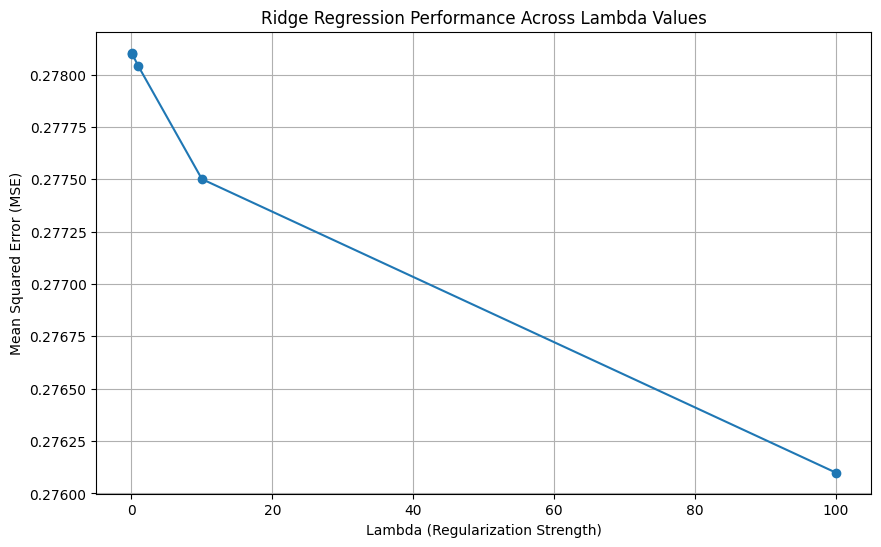

In [127]:
# Visualize MSE vs. Lambda
lambdas = [result[0] for result in ridge_results]
mse_values = [result[1]["Mean Squared Error (MSE)"] for result in ridge_results]

plt.figure(figsize=(10, 6))
plt.plot(lambdas, mse_values, marker='o', linestyle='-')
plt.xlabel("Lambda (Regularization Strength)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Ridge Regression Performance Across Lambda Values")
plt.grid(True)
plt.show()

# **Nonlinear models**

## **Polynomial Regression**

In [128]:
# Codes: https://www.javatpoint.com/machine-learning-polynomial-regression

In [157]:
def train_polynomial_regression(X_train, y_train, X_validation, y_validation, degree):
    """
    Train a polynomial regression model manually without using a pipeline.
    """
    # polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)  # Transform training features
    X_validation_poly = poly.transform(X_validation)  # Transform validation features

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_validation_poly)

    mse = mean_squared_error(y_validation, y_pred)
    mae = mean_absolute_error(y_validation, y_pred)
    r2 = r2_score(y_validation, y_pred)

    return mse, mae, r2

In [159]:
# degrees to evaluate
degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10]

poly_results = {}

for degree in degrees:
    mse, mae, r2 = train_polynomial_regression(X_train, y_train, X_validation, y_validation, degree)

    poly_results[degree] = {
        "MSE": mse,
        "MAE": mae,
        "R^2": r2
    }
    print(f"Degree: {degree} -> MSE: {mse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

Degree: 2 -> MSE: 0.1608, MAE: 0.2299, R^2: 0.8017
Degree: 3 -> MSE: 0.0912, MAE: 0.1863, R^2: 0.8876
Degree: 4 -> MSE: 0.1957, MAE: 0.1702, R^2: 0.7587
Degree: 5 -> MSE: 10.5357, MAE: 0.3093, R^2: -11.9879
Degree: 6 -> MSE: 8590.1249, MAE: 8.1119, R^2: -10588.4459
Degree: 7 -> MSE: 21210269.0258, MAE: 149.5893, R^2: -26146882.4154
Degree: 8 -> MSE: 59651508.4116, MAE: 227.8973, R^2: -73535183.0231
Degree: 9 -> MSE: 30240450.3631, MAE: 166.0710, R^2: -37278806.2188
Degree: 10 -> MSE: 79986173.9839, MAE: 296.4386, R^2: -98602669.4074


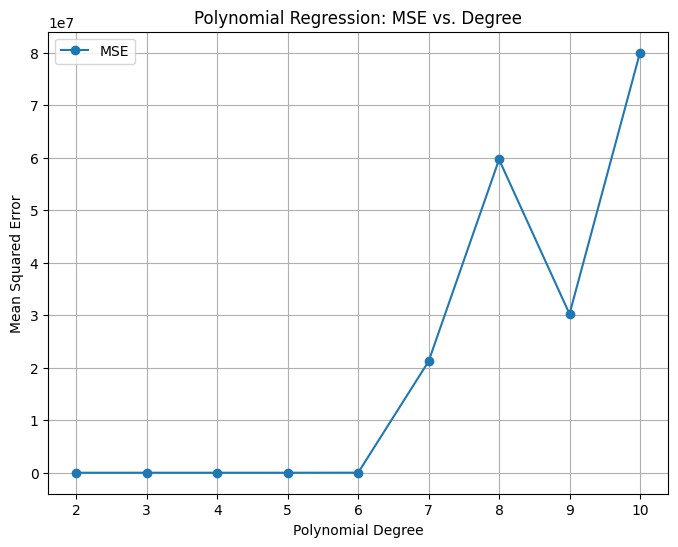

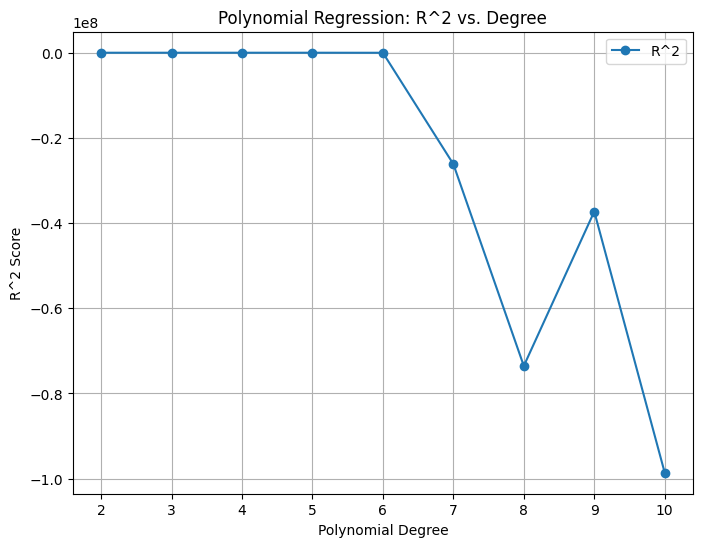

In [131]:
# Extract metrics for visualization
degrees = list(poly_results.keys())
mse_values = [poly_results[degree]["MSE"] for degree in degrees]
mae_values = [poly_results[degree]["MAE"] for degree in degrees]
r2_values = [poly_results[degree]["R^2"] for degree in degrees]

# Plot MSE
plt.figure(figsize=(8, 6))
plt.plot(degrees, mse_values, marker='o', label="MSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Polynomial Regression: MSE vs. Degree")
plt.grid()
plt.legend()
plt.show()

# Plot R^2
plt.figure(figsize=(8, 6))
plt.plot(degrees, r2_values, marker='o', label="R^2")
plt.xlabel("Polynomial Degree")
plt.ylabel("R^2 Score")
plt.title("Polynomial Regression: R^2 vs. Degree")
plt.grid()
plt.legend()
plt.show()


## **Gaussian Kernel (RBF)**

In [132]:
# Codes: https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html
# https://scikit-learn.org/1.5/modules/generated/sklearn.gaussian_process.kernels.RBF.html

In [133]:
def rbf_kernel_with_linear_regression(X_train, y_train, X_validation, y_validation, gamma_values):

    results_rbf = {}

    for gamma in gamma_values:
        # Transform the features using the RBF kernel
        K_train = rbf_kernel(X_train, X_train, gamma=gamma)  # Kernel matrix for training
        K_validation = rbf_kernel(X_validation, X_train, gamma=gamma)  # Kernel matrix for validation

        # Train the LinearRegression model on the kernel-transformed features
        model = LinearRegression()
        model.fit(K_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(K_validation)

        mse = mean_squared_error(y_validation, y_pred)
        mae = mean_absolute_error(y_validation, y_pred)
        r2 = r2_score(y_validation, y_pred)

        results_rbf[gamma] = {
            "MSE": mse,
            "MAE": mae,
            "R^2": r2
        }

        print(f"Gamma: {gamma} -> MSE: {mse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

    return results_rbf


In [134]:
def rbf_kernel_with_ridge(X_train, y_train, X_validation, y_validation, gamma_values, alpha_values):
    results_rbf = {}
    # Transform features using RBF kernel
    K_train = rbf_kernel(X_train, X_train, gamma=gamma)  # Kernel matrix for training
    K_validation = rbf_kernel(X_validation, X_train, gamma=gamma)  # Kernel matrix for validation

    # Train Ridge regression on the transformed features
    model = Ridge(alpha=alpha)
    model.fit(K_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(K_validation)

    mse = mean_squared_error(y_validation, y_pred)
    mae = mean_absolute_error(y_validation, y_pred)
    r2 = r2_score(y_validation, y_pred)

    return mse, mae, r2

In [135]:
# Gamma is the kernel coefficient
gamma_values = [0.1, 0.5, 1, 5]

results_rbf = rbf_kernel_with_linear_regression(X_train, y_train, X_validation, y_validation, gamma_values)

Gamma: 0.1 -> MSE: 13394346.2375, MAE: 563.0297, R^2: -16511831.5031
Gamma: 0.5 -> MSE: 184038914458.9359, MAE: 152983.2475, R^2: -226873314731.8150
Gamma: 1 -> MSE: 839779899105526.8750, MAE: 13407849.1841, R^2: -1035235672391289.7500
Gamma: 5 -> MSE: 10101637111026300928.0000, MAE: 1970310214.1922, R^2: -12452757083165224960.0000


In [136]:
alpha_values = [0.1, 1, 10]      # is regularization parameter for Ridge

results_rbf_ridge = {}

# Loop over gamma and alpha values
for gamma in gamma_values:
    for alpha in alpha_values:

        mse, mae, r2 = rbf_kernel_with_ridge(X_train, y_train, X_validation, y_validation, gamma, alpha)

        results_rbf_ridge[(gamma, alpha)] = {
            "MSE": mse,
            "MAE": mae,
            "R^2": r2
        }
        print(f"Gamma: {gamma}, Alpha: {alpha} -> MSE: {mse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

Gamma: 0.1, Alpha: 0.1 -> MSE: 0.1127, MAE: 0.1259, R^2: 0.8611
Gamma: 0.1, Alpha: 1 -> MSE: 0.1551, MAE: 0.1554, R^2: 0.8088
Gamma: 0.1, Alpha: 10 -> MSE: 0.3034, MAE: 0.1863, R^2: 0.6259
Gamma: 0.5, Alpha: 0.1 -> MSE: 0.3213, MAE: 0.1362, R^2: 0.6040
Gamma: 0.5, Alpha: 1 -> MSE: 0.3547, MAE: 0.1627, R^2: 0.5627
Gamma: 0.5, Alpha: 10 -> MSE: 0.4612, MAE: 0.2281, R^2: 0.4314
Gamma: 1, Alpha: 0.1 -> MSE: 0.3957, MAE: 0.1623, R^2: 0.5123
Gamma: 1, Alpha: 1 -> MSE: 0.4318, MAE: 0.1970, R^2: 0.4677
Gamma: 1, Alpha: 10 -> MSE: 0.5567, MAE: 0.2868, R^2: 0.3137
Gamma: 5, Alpha: 0.1 -> MSE: 0.5590, MAE: 0.2624, R^2: 0.3109
Gamma: 5, Alpha: 1 -> MSE: 0.5979, MAE: 0.3136, R^2: 0.2630
Gamma: 5, Alpha: 10 -> MSE: 0.7142, MAE: 0.4143, R^2: 0.1195


In [137]:
# Find the best (gamma, alpha) based on the lowest MSE
best_params = min(results_rbf_ridge, key=lambda x: results_rbf_ridge[x]["MSE"])
best_gamma, best_alpha = best_params
best_performance = results_rbf_ridge[best_params]

print(f"\nBest Model -> Gamma: {best_gamma}, Alpha: {best_alpha}")
print(f"Performance: MSE = {best_performance['MSE']:.4f}, MAE = {best_performance['MAE']:.4f}, R^2 = {best_performance['R^2']:.4f}")


Best Model -> Gamma: 0.1, Alpha: 0.1
Performance: MSE = 0.1127, MAE = 0.1259, R^2 = 0.8611


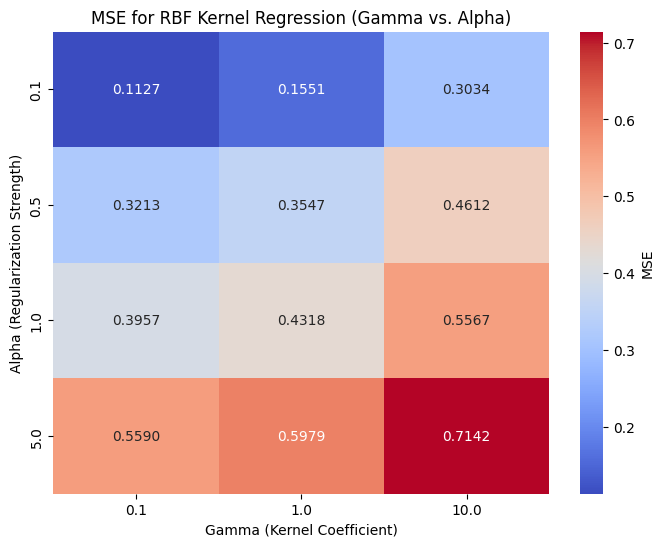

In [138]:
results_rbf_df = pd.DataFrame.from_dict(results_rbf_ridge, orient='index').reset_index()
results_rbf_df.columns = ['Gamma', 'Alpha', 'MSE', 'MAE', 'R^2']

heatmap_data = results_rbf_df.pivot(index='Gamma', columns='Alpha', values='MSE')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="coolwarm", cbar_kws={'label': 'MSE'})
plt.title("MSE for RBF Kernel Regression (Gamma vs. Alpha)")
plt.ylabel("Alpha (Regularization Strength)")
plt.xlabel("Gamma (Kernel Coefficient)")
plt.show()

# **Model Evaluation on Test Set**

In [160]:
# Track the best model and its metrics
best_model_name = None
best_model_metrics = None
lowest_mse = float('inf')

# Closed-Form Performance
print("Performance Metrics for Closed-Form Linear Regression:")
for metric, value in closed_form_performance_metrics.items():
    print(f"{metric}: {value:.4f}")
if closed_form_performance_metrics["Mean Squared Error (MSE)"] < lowest_mse:
    lowest_mse = closed_form_performance_metrics["Mean Squared Error (MSE)"]
    best_model_name = "Closed-Form Linear Regression"
    best_model_metrics = closed_form_performance_metrics

# Gradient Descent Performance
print("\nGradient Descent Model Performance:")
for metric, value in performance_gd.items():
    print(f"{metric}: {value:.4f}")
if performance_gd["Mean Squared Error (MSE)"] < lowest_mse:
    lowest_mse = performance_gd["Mean Squared Error (MSE)"]
    best_model_name = "Gradient Descent"
    best_model_metrics = performance_gd

# LASSO Results
print("\nLASSO Regularization Results:")
for index, row in lasso_results_df.iterrows():
    performance = row['Performance']
    print(f"Lambda: {row['Lambda']}, MSE: {performance['Mean Squared Error (MSE)']:.4f}, "
          f"MAE: {performance['Mean Absolute Error (MAE)']:.4f}, "
          f"R-squared: {performance['R-squared']:.4f}")
    if performance["Mean Squared Error (MSE)"] < lowest_mse:
        lowest_mse = performance["Mean Squared Error (MSE)"]
        best_model_name = f"LASSO (Lambda = {row['Lambda']})"
        best_model_metrics = performance

# Ridge Results
print("\nRidge Regularization Results:")
for lambda_, performance in ridge_results:
    print(f"Lambda: {lambda_}, MSE: {performance['Mean Squared Error (MSE)']:.4f}, "
          f"MAE: {performance['Mean Absolute Error (MAE)']:.4f}, "
          f"R-squared: {performance['R-squared']:.4f}")
    if performance["Mean Squared Error (MSE)"] < lowest_mse:
        lowest_mse = performance["Mean Squared Error (MSE)"]
        best_model_name = f"Ridge (Lambda = {lambda_})"
        best_model_metrics = performance

# Polynomial Regression Results
print("\nPolynomial Regression Results:")
print(f"{'Degree':<10} {'MSE':<10} {'MAE':<10} {'R^2':<10}")
for degree, metrics in poly_results.items():
    print(f"{degree:<10} {metrics['MSE']:<10.4f} {metrics['MAE']:<10.4f} {metrics['R^2']:<10.4f}")
    if metrics["MSE"] < lowest_mse:
        lowest_mse = metrics["MSE"]
        best_model_name = f"Polynomial Regression (Degree = {degree})"
        best_model_metrics = metrics

# Gaussian Kernel (RBF) Results
print("\nGaussian Kernel (RBF) Results:")
print(f"{'Gamma':<10} {'Alpha':<10} {'MSE':<10} {'MAE':<10} {'R^2':<10}")
print("-" * 50)
for (gamma, alpha), metrics in results_rbf_ridge.items():
    print(f"{gamma:<10.2f} {alpha:<10.2f} {metrics['MSE']:<10.4f} {metrics['MAE']:<10.4f} {metrics['R^2']:<10.4f}")
    if metrics["MSE"] < lowest_mse:
        lowest_mse = metrics["MSE"]
        best_model_name = f"Gaussian Kernel (Gamma = {gamma}, Alpha = {alpha})"
        best_model_metrics = metrics

Performance Metrics for Closed-Form Linear Regression:
Mean Squared Error (MSE): 0.2781
Mean Absolute Error (MAE): 0.2847
R-squared: 0.6572

Gradient Descent Model Performance:
Mean Squared Error (MSE): 0.2752
Mean Absolute Error (MAE): 0.2807
R-squared: 0.6608

LASSO Regularization Results:
Lambda: 0.01, MSE: 0.2738, MAE: 0.2765, R-squared: 0.6625
Lambda: 0.1, MSE: 0.3025, MAE: 0.2571, R-squared: 0.6271
Lambda: 1.0, MSE: 0.8087, MAE: 0.4859, R-squared: 0.0031
Lambda: 10.0, MSE: 0.8125, MAE: 0.4875, R-squared: -0.0017
Lambda: 100.0, MSE: 0.8125, MAE: 0.4875, R-squared: -0.0017

Ridge Regularization Results:
Lambda: 0.01, MSE: 0.2781, MAE: 0.2847, R-squared: 0.6572
Lambda: 0.1, MSE: 0.2781, MAE: 0.2847, R-squared: 0.6572
Lambda: 1, MSE: 0.2780, MAE: 0.2846, R-squared: 0.6572
Lambda: 10, MSE: 0.2775, MAE: 0.2830, R-squared: 0.6579
Lambda: 100, MSE: 0.2761, MAE: 0.2709, R-squared: 0.6596

Polynomial Regression Results:
Degree     MSE        MAE        R^2       
2          0.1608     0.22

In [164]:
print("\nBest Model:")
print(f"Model: {best_model_name}")
for metric, value in best_model_metrics.items():
    print(f"{metric}: {value:.4f}")


Best Model:
Model: Polynomial Regression (Degree = 3)
MSE: 0.0912
MAE: 0.1863
R^2: 0.8876


In [176]:
mse, mae, r2 = train_polynomial_regression(X_train, y_train, X_test, y_test, 3)

print(f"Test Set Performance for Best Polynomial Regression Model:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

Test Set Performance for Best Polynomial Regression Model:
MSE: 0.1224
MAE: 0.1848
R^2: 0.8501


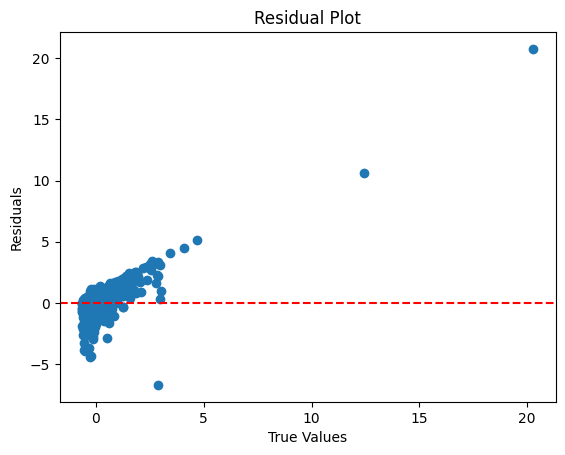

In [178]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# **Feature Selection Using Forward Selection**

In [167]:
!pip install mlxtend

In [168]:
# importing the models

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

# codes in this section: https://www.analyticsvidhya.com/blog/2021/04/forward-feature-selection-and-its-implementation/#:~:text=Forward%20Feature%20Selection%20is%20a,a%20stopping%20criterion%20is%20met.

In [169]:
# calling the linear regression model
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=4, forward=True, verbose=2, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

k_features tells us how many features should be selected. We’ve passed 5 so the model will train until 4 features are selected.
numerical feature: engine_capacity, cylinder, horse_power, top_speed, seats

In [170]:
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    3.0s finished

[2024-11-28 16:43:00] Features: 1/4 -- score: -0.5980407427673615[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished

[2024-11-28 16:43:00] Features: 2/4 -- score: -0.5781065858970293[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished

[2024-11-28 16:43:00] Features: 3/4 -- score: -0.5714817999907609[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished

[2024-11-28 16:43:01] Features: 4/4 -- score: -0.570304324043802

In [171]:
selected_features = list(sfs1.k_feature_names_)
print(selected_features)

['engine_capacity', 'cylinder', 'horse_power', 'seats']


In [172]:
print("Type of selected_features:", type(selected_features))
print("Content of selected_features:", selected_features)


Type of selected_features: <class 'list'>
Content of selected_features: ['engine_capacity', 'cylinder', 'horse_power', 'seats']


In [173]:
# Assuming 'X_train' is a pandas DataFrame
selected_features_indices = [X_train.columns.get_loc(feature) for feature in selected_features]
print("Converted Selected Features (indices):", selected_features_indices)


Converted Selected Features (indices): [0, 1, 2, 4]


In [174]:
# Subset the data to include only selected features using .iloc for positional indexing
X_train_selected = X_train.iloc[:, selected_features_indices]
X_validation_selected = X_validation.iloc[:, selected_features_indices]

# Train Linear Regression on the selected features
lreg.fit(X_train_selected, y_train)

# Make predictions on the validation set
y_pred_selected = lreg.predict(X_validation_selected)

# Evaluate performance
performance = evaluate_model(y_validation, y_pred_selected)

print("\nPerformance Metrics for Selected Features:")
for metric, value in performance.items():
    print(f"{metric}: {value}")



Performance Metrics for Selected Features:
Mean Squared Error (MSE): 0.2785908221111491
Mean Absolute Error (MAE): 0.2825069680142864
R-squared: 0.6565681586836403


In [175]:
# Train Linear Regression on all features
lreg.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_all = lreg.predict(X_validation)

# Evaluate performance
performance_all = evaluate_model(y_validation, y_pred_all)

print("\nPerformance Metrics with All Features:")
for metric, value in performance_all.items():
    print(f"{metric}: {value}")


Performance Metrics with All Features:
Mean Squared Error (MSE): 0.2781048538696931
Mean Absolute Error (MAE): 0.2847423104222839
R-squared: 0.6571672342982631
